# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откроем файл с данными и изучим общую информацию. 

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

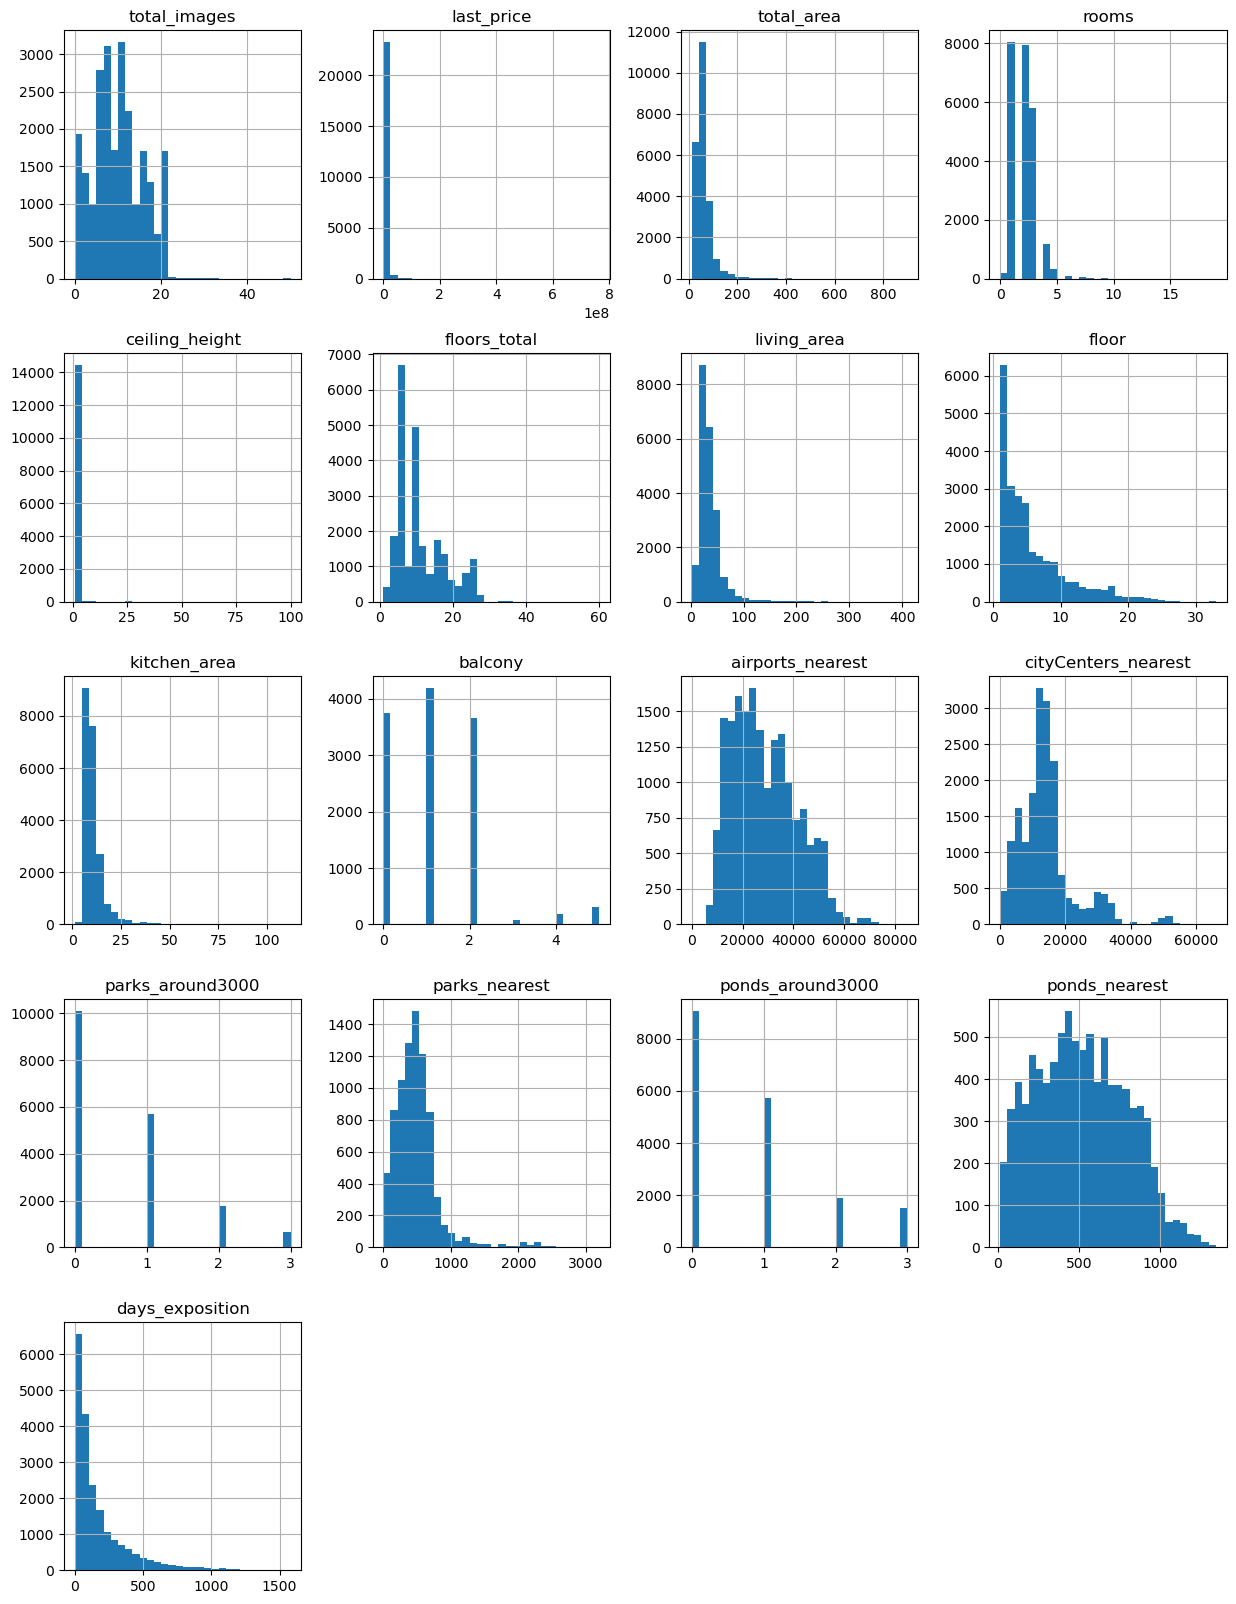

In [4]:
data.hist(bins=30, figsize=(15, 20));

In [5]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


В многих данных присутствуют выбросы, которые смещают графики влево и мешают увидеть объективную картину.  

In [6]:
data = data.rename(columns={"cityCenters_nearest": "city_centers_nearest"}) #переименуем столбец названный не змеиным регистром

### Предобработка данных

#### Удаление пропусков

In [7]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [8]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), legend = False, fontsize = 16, xlim=(0,100))
            .set_title('Процент пропусков \n', fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

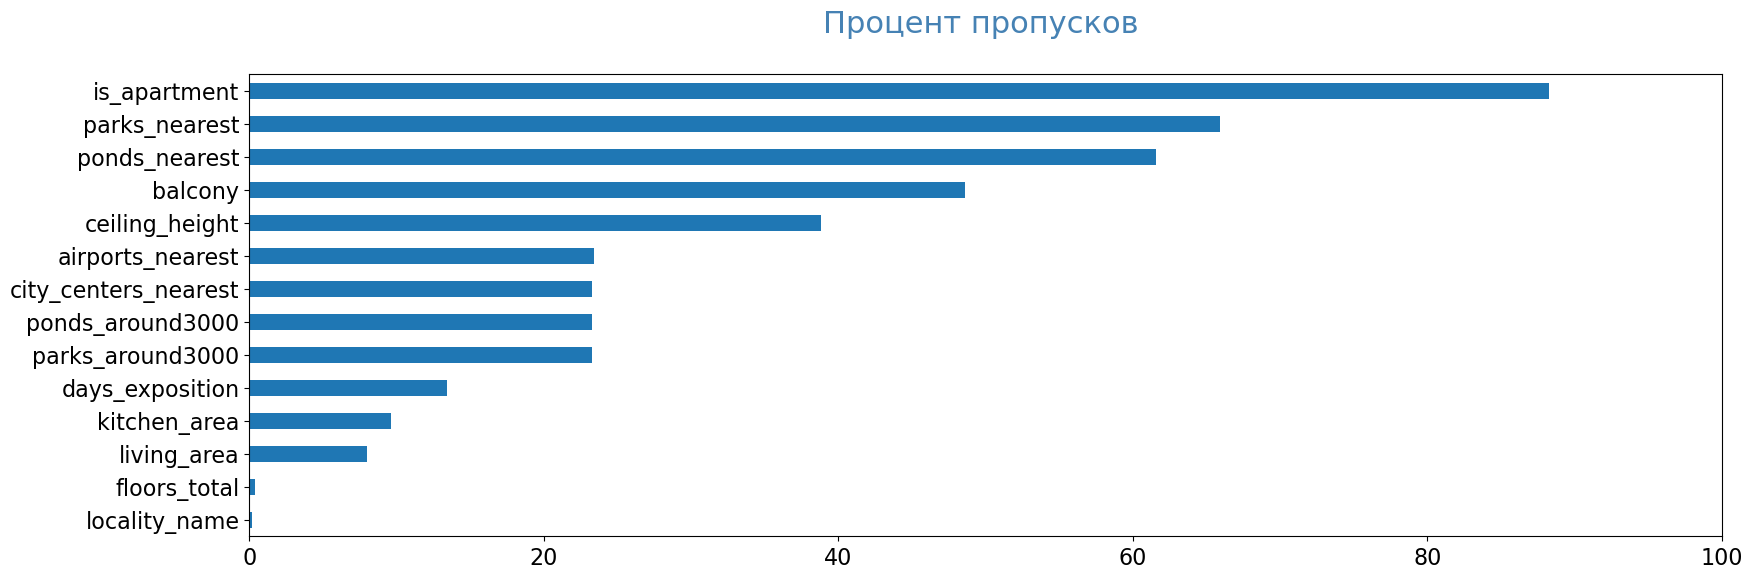

In [9]:
pass_value_barh(data)

Если в данных есть пропуск в количестве балконов, можем предположить что у этой недвижимости нет балкона.
Поэтому заменяем пропущенные данные нулями.

In [10]:
data.loc[data['balcony'].isna(),'balcony'] = 0

В графах с количеством прудов и парков в радиусе 3 км, если указано nan то это скорее всего означает их отсутствие в заданном радиусе

In [11]:
data.loc[data['parks_around3000'].isna(),'parks_around3000'] = 0
data.loc[data['ponds_around3000'].isna(),'ponds_around3000'] = 0

In [12]:
print(data['is_apartment'].unique())

[nan False True]


Данные в графе is_apartment должны быть булевыми, как заявлено в описании данных, но там так же присутствует значение nan и есть пропуски. Можно предположить, что если напрямую не указано что недвижимость это апартаменты, то они ими не являются. Поэтому заполним пропуски в этой графе значением False

In [13]:
data.loc[(data['is_apartment'] == 'nan') | (data['is_apartment'].isna()),'is_apartment'] = False

Если у нас не указано название населенного пункта, то напишем unknown

In [14]:
data.loc[data['locality_name'].isna(),'locality_name'] = 'unknown'

В числе дней, сколько провисело объявление скорее всего произошла техническая ошибка, так как такая цифра скорее всего считалась автоматически. Возможно это те объявления которые не были сняты на момент выгрузки архива, поэтому и не был подсчитан срок.

In [15]:
data = data.dropna(subset=['floors_total']).reset_index(drop=True)

Пропусков в количестве этажей немного, поэтому просто удалим эти строки

Оставшиеся данные являются численными и скорее всего не были заполнены потому, что заполнявший не знал этих цифр. Оставим на этих местах пропуски, чтобы искажение этих данных не меняло наши выводы.

#### Исправление типов данных

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23613 entries, 0 to 23612
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23613 non-null  int64  
 1   last_price            23613 non-null  float64
 2   total_area            23613 non-null  float64
 3   first_day_exposition  23613 non-null  object 
 4   rooms                 23613 non-null  int64  
 5   ceiling_height        14495 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21743 non-null  float64
 8   floor                 23613 non-null  int64  
 9   is_apartment          23613 non-null  object 
 10  studio                23613 non-null  bool   
 11  open_plan             23613 non-null  bool   
 12  kitchen_area          21382 non-null  float64
 13  balcony               23613 non-null  float64
 14  locality_name         23613 non-null  object 
 15  airports_nearest   

Заменим в данных о дате публикации строку на дату и время

In [17]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

На предыдущем этапе мы уже заменили пропуски в графе является ли апартаментами на True и False. Теперь изменим тип данных, чтобы они стали действительно булевыми.

In [18]:
data['is_apartment'] = data['is_apartment'].astype('bool')

Следующая группа значений по логике не может быть не целочисленной, но записана как вещественная. Исправим это.

In [19]:
to_int = ('balcony', 'parks_around3000','ponds_around3000','floors_total')
for i in to_int:
    data[i] = data[i].astype('int')

#### Обработка дубликатов

In [20]:
print(len(data['locality_name'].unique()))
data['locality_name'].unique()

365


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [21]:
def reduce_names(name):
    duplicated = ['городской ', 'городского типа ', 'посёлок ', 'деревня ',
                   'коттеджный ', 'поселок ', 'станции ', 'садоводческое некоммерческое товарищество ',
                   'садовое товарищество ', 'село ', 'при железнодорожной ']
    for i in duplicated:
        name=name.replace(i, '')
    return name
    
data['locality_name'] = data['locality_name'].apply(reduce_names)

In [22]:
len(data['locality_name'].unique())

306

Итого сократили количество населенных пунктов с 365 до 306

In [23]:
# check
data.locality_name.nunique()

306

In [24]:
data.duplicated().sum()

0

Полных дубликатов в датасете нет

In [25]:
data.duplicated(subset=['locality_name','rooms','floor','total_area','city_centers_nearest','floors_total','last_price']).sum()

18

In [26]:
data = data.drop_duplicates(subset=['locality_name','rooms','floor',
                               'total_area','city_centers_nearest',
                               'floors_total','last_price']).reset_index(drop=True)

Удалим идентичные объявления. Скорее всего они появились из-за того, то объявление вывесили еще раз.

####  Обработка аномальных значений

Изучим распределение данных выглядящих подозрительно

<AxesSubplot:>

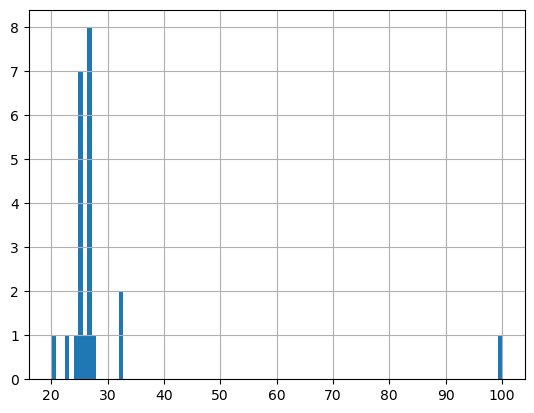

In [27]:
data[data['ceiling_height']>15]['ceiling_height'].hist(bins=100)

In [28]:
data.loc[data['ceiling_height'] > 15,'ceiling_height'] = data.loc[data['ceiling_height'] > 15,'ceiling_height']/10

Перезаписали строки, там где потолок превышает 15 метров, уменьшив в 10 раз

Так же присутствуют строки в которых высота потолка ниже 2 метров. Таких значений очень мало и они не реалистичные. Нет смысла пытаться их исправить, так что просто их удалим.

In [29]:
data = data.query('ceiling_height > 2 or ceiling_height.isna()') # добавили условие, чтобы пропущенные занчения не удалились

In [30]:
data.query('last_price < 100000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8762,7,12190.0,109.0,2019-03-20,2,2.75,25,32.0,25,False,...,40.5,0,Санкт-Петербург,36421.0,9176.0,1,805.0,0,NaN,8.0


В данных есть одна недвижимость, стоимость которой сильно ниже рынка. Нет смысла ее исправлять, удалим

In [31]:
data = data.query('last_price > 100000 or last_price.isna()')

Так же у нас в данных о цене, площади и высотой потолка присутствуют значения сильно выше рынка, которые мешают нам увидеть картину целиком. Уберем пол процента данных с самыми высокими значениями.

In [32]:
#data = data[data['last_price']<data['last_price'].quantile(0.995)]
#data = data[data['total_area']<data['total_area'].quantile(0.995)]
#data = data[(data['living_area']<data['living_area'].quantile(0.995))|data['living_area'].isna()]
#data = data[(data['kitchen_area']<data['kitchen_area'].quantile(0.995))|data['kitchen_area'].isna()]
#data = data[(data['ceiling_height']<data['ceiling_height'].quantile(0.995))|data['ceiling_height'].isna()]

quantile_cut = ('last_price','total_area','living_area','kitchen_area','ceiling_height','floors_total','days_exposition')
for i in quantile_cut:
    data = data[(data[i]<data[i].quantile(0.99))|data[i].isna()]

### Посчитаем и добавим в таблицу новые столбцы

In [43]:
data['price_per_meter'] = round(data['last_price']/data['total_area'],2) #вычислили цену за метр и округлили

In [44]:
data['published_weekday'] = data['first_day_exposition'].dt.weekday #новый столбец с днем недели даты публикации

In [45]:
data['published_month'] = data['first_day_exposition'].dt.month #новый столбец с месяцом даты публикации

In [46]:
data['published_year'] = data['first_day_exposition'].dt.year #новый столбец с годом даты публикации

In [47]:
data['floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25], dtype=int64)

In [48]:
def categorize_floor(row):                         #возвращает категорию этажа: первый, последний или другой
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'
    
data['floor_type'] = data.apply(categorize_floor, axis=1)

In [49]:
data['city_centers_nearest'] = round(data['city_centers_nearest']/1000) #переводим метры в километры и округляем

### Проведем исследовательский анализ данных

#### Параметры объектов

##### Распределение общей площади

count    21969.000000
mean        55.473161
std         21.584619
min         12.000000
25%         39.900000
50%         50.600000
75%         66.200000
max        168.300000
Name: total_area, dtype: float64

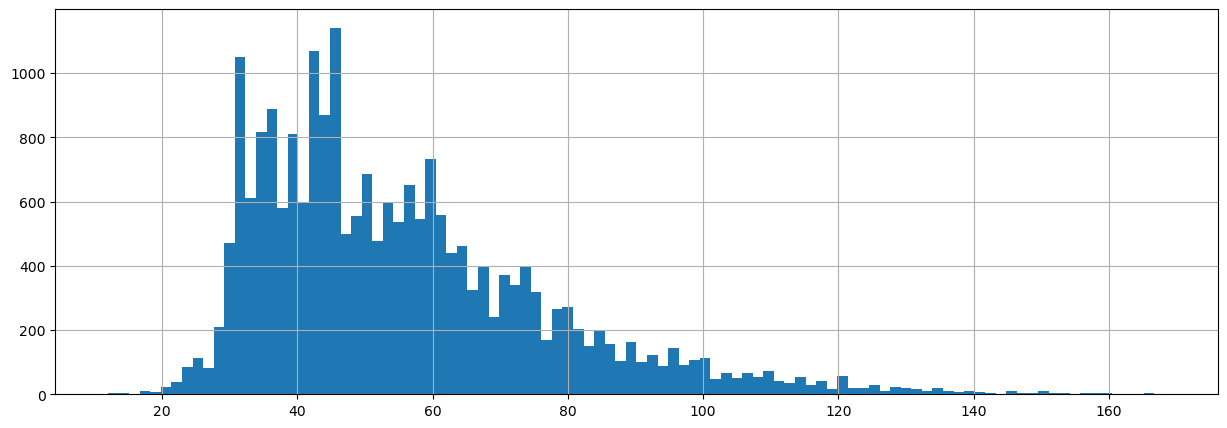

In [50]:
data['total_area'].hist(bins=100, figsize=(15,5))
data['total_area'].describe()

График распределения общей площади выглядит стремящимся к пуассоновскому, только у нас есть  непонятный пик на 30 и 45 метрах и провал на 50. Возможно это связано с комнатностью квартир. Проверим.

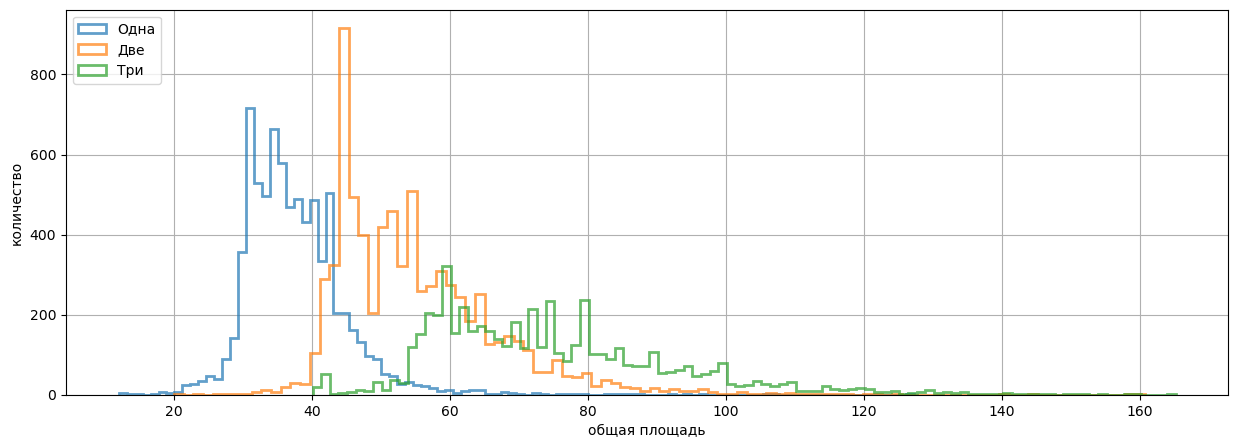

In [51]:
ax = data.query('rooms == 1').plot(  #строим графики для каждой из трех самых распространенных категорий комнатности
    kind='hist',
    y='total_area',
    bins=100,
    histtype='step',
    linewidth=2,
    alpha=0.7,
    label='Одна'
)
data.query('rooms == 2').plot(
    kind='hist',
    y='total_area',
    histtype='step',
    bins=100,
    linewidth=2,
    alpha=0.7,
    label='Две',
    ax=ax,
    grid=True,
    legend=True,
) 

data.query('rooms == 3').plot(
    kind='hist',
    y='total_area',
    histtype='step',
    bins=100,
    linewidth=2,
    alpha=0.7,
    label='Три',
    ax=ax,
    grid=True,
    legend=True,
    figsize=(15,5),
) 

ax.set_xlabel('общая площадь')
ax.set_ylabel('количество');

Два пика действительно получились из-за пиков в двух самых многочисленных категорий. 
Провал же около 50 метров в срезе двухкомнатных объектов этим не объясняется. Возможно на это могут влиять какие-то другие факторы, такие как категория объекта, его класс и т.д.
В целом, у однокомнатных объектов чаще всего общая площать равняется 30м, у духкомнатных 45м, а у трехкомнатных 60м.

##### Распределение жилой площади

count    20220.000000
mean        31.762774
std         14.386362
min          2.000000
25%         18.500000
50%         30.000000
75%         41.000000
max         87.800000
Name: living_area, dtype: float64

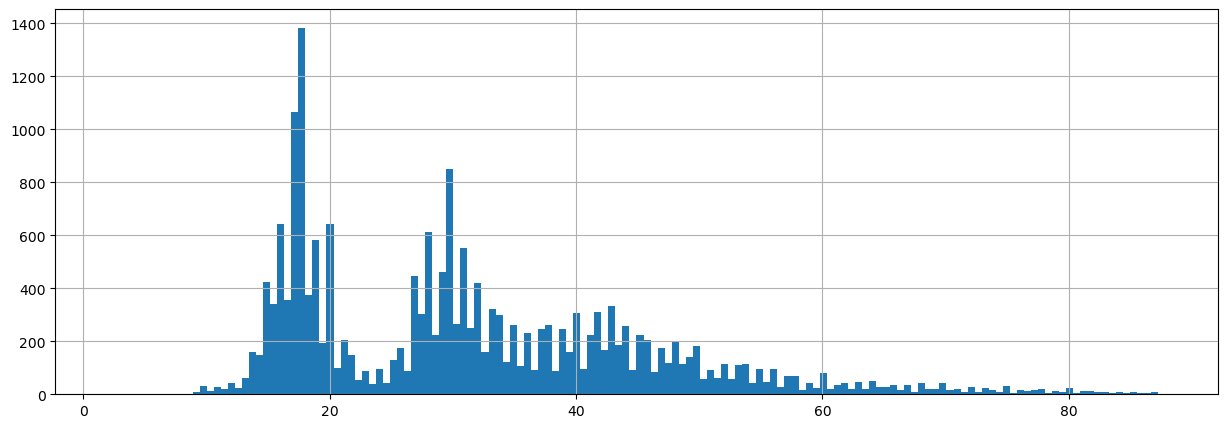

In [52]:
data['living_area'].hist(bins=150, figsize=(15,5))
data['living_area'].describe()

На графике явно видны два пика и два провала. Возможно это тоже связано с комнатностью.

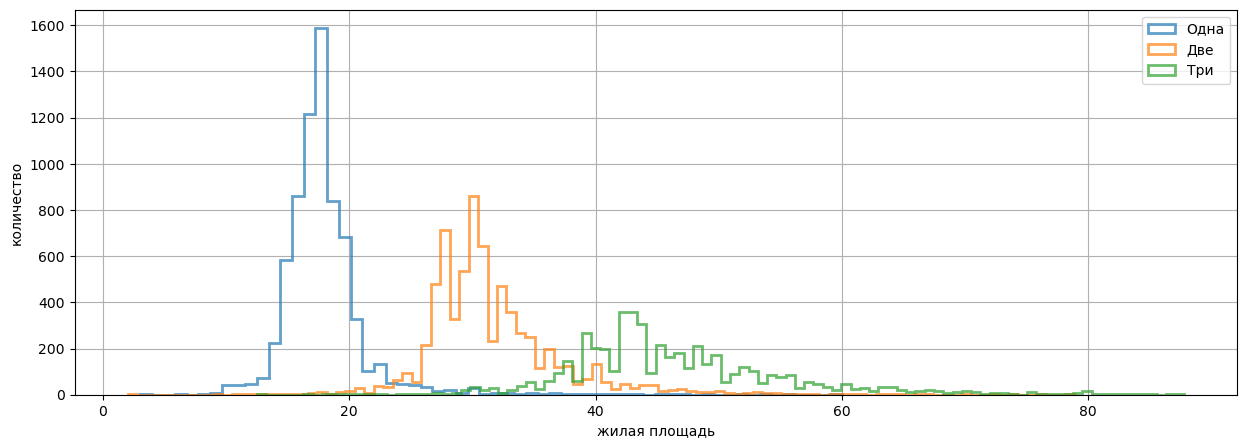

In [53]:
ax = data.query('rooms == 1').plot(  #строим графики для каждой из трех самых распространенных категорий комнатности
    kind='hist',
    y='living_area',
    bins=60,
    histtype='step',
    linewidth=2,
    alpha=0.7,
    label='Одна'
)
data.query('rooms == 2').plot(
    kind='hist',
    y='living_area',
    histtype='step',
    bins=100,
    linewidth=2,
    alpha=0.7,
    label='Две',
    ax=ax,
    grid=True,
    legend=True,
) 

data.query('rooms == 3').plot(
    kind='hist',
    y='living_area',
    histtype='step',
    bins=100,
    linewidth=2,
    alpha=0.7,
    label='Три',
    ax=ax,
    grid=True,
    legend=True,
    figsize=(15,5),
)

ax.set_xlabel('жилая площадь')
ax.set_ylabel('количество');

Разделив объекты по комнатности, распределения стали более плавными. 
Стало заметно, что у однокомнатных объектов жилая площадь чаще всего около 18 метров, у двухкомнатных - 30, а у трехкомнатных - 43.

##### Распределение площади кухни

count    19857.000000
mean         9.787434
std          3.833176
min          1.300000
25%          7.000000
50%          9.000000
75%         11.300000
max         29.900000
Name: kitchen_area, dtype: float64

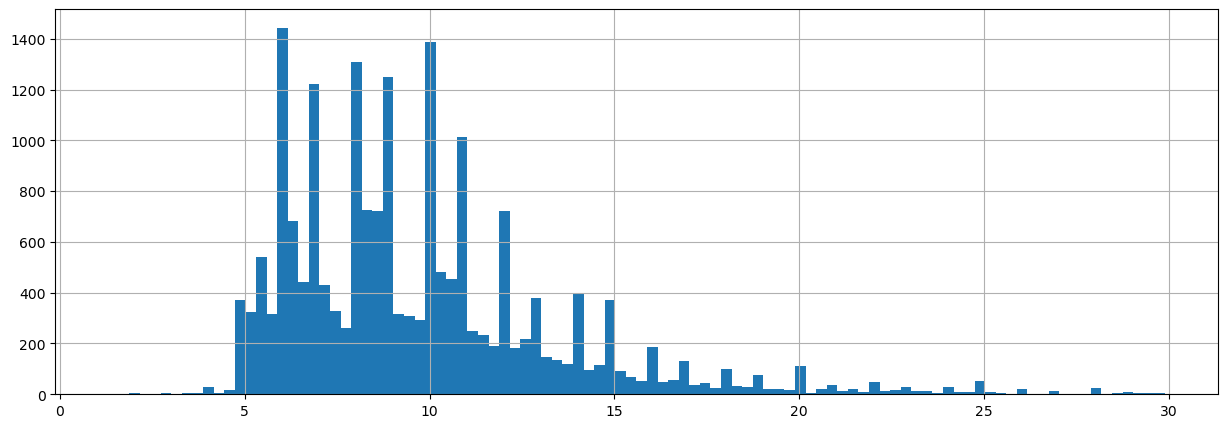

In [54]:
data['kitchen_area'].hist(bins=100, figsize=(15,5))
data['kitchen_area'].describe()

Тут тоже наблюдается два пика из-за комнатости. Так же отдельные цифры выделяются на круглых значениях

##### Распределение цены в миллионах

count    21969.000000
mean         5.407406
std          3.525216
min          0.430000
25%          3.380000
50%          4.500000
75%          6.390000
max         35.900000
Name: last_price, dtype: float64

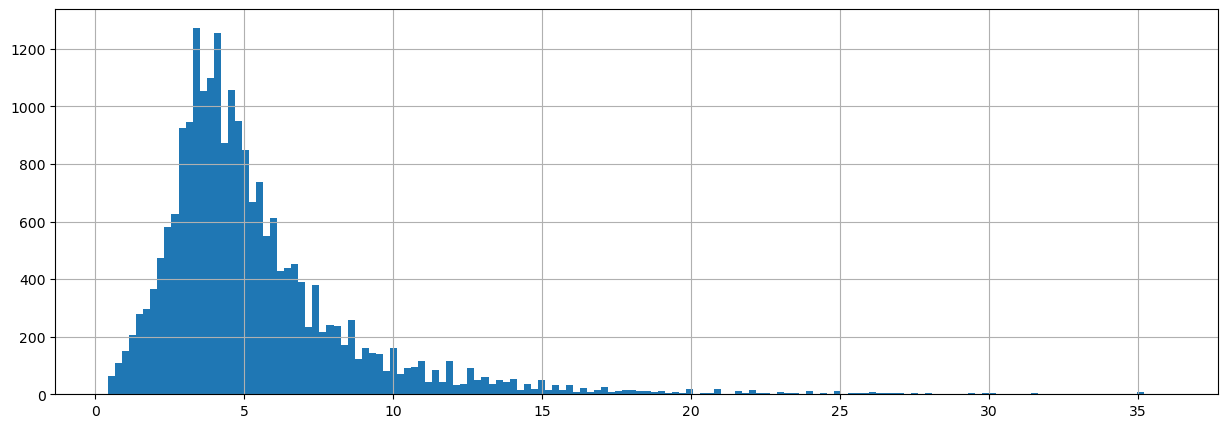

In [55]:
(data['last_price']/1000000).hist(bins=150,figsize=(15,5))
(data['last_price']/1000000).describe()

Медианная цена на объекты в нашей выборке 4,5 млн. Среднее же выше почти на миллион. Это показывает, что у нас есть отдельные выбросы ввиде очень дорогих объектов. График достаточно плавный, здесь не наблюдается отдельных пиков для разной комнатности.

##### Распределение по количеству комнат

count    21969.000000
mean         1.983613
std          0.929755
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

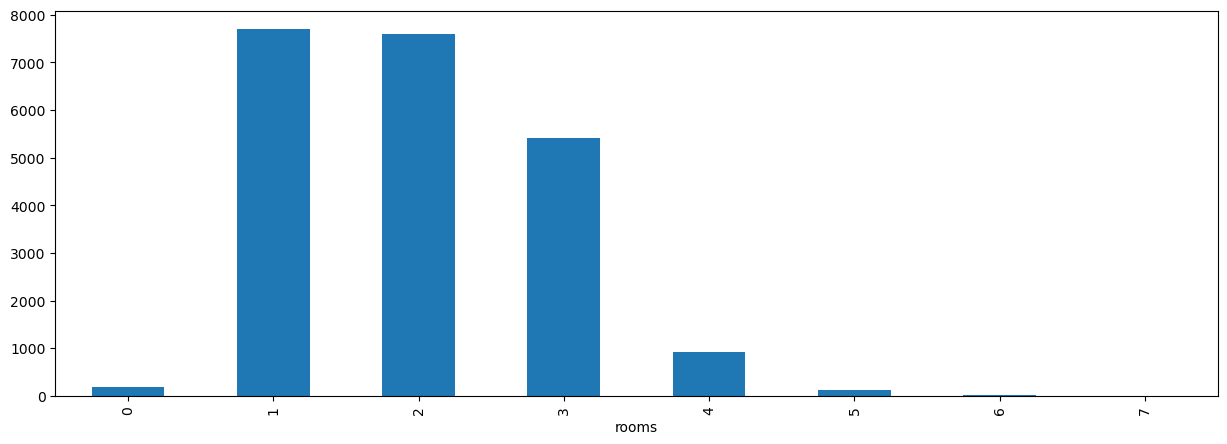

In [56]:
data.groupby('rooms')['rooms'].count().plot(kind='bar',figsize=(15,5))
data['rooms'].describe()

В нашей подборке есть объекты от 0 до 7 комнат. 0 это скорее всего студии. 
Больше всего у нас одно- двух- и трех- комнатных объектов.

In [57]:
data.query('studio')['rooms'].unique()

array([0, 1], dtype=int64)

Студии в выборке иногда записаны как однокомнатные, а иногда как квартиры с 0 комнат. 

##### Распределение по высоте потолков

count    13396.000000
mean         2.693223
std          0.215803
min          2.200000
25%          2.500000
50%          2.640000
75%          2.770000
max          3.600000
Name: ceiling_height, dtype: float64

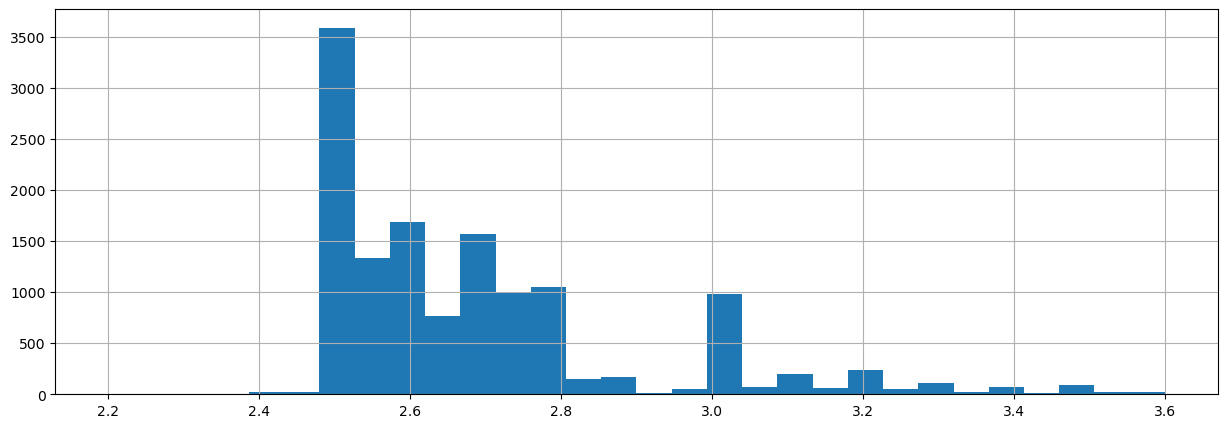

In [58]:
data['ceiling_height'].hist(bins=30,figsize=(15,5))
data['ceiling_height'].describe()

В основном в нашей базе данных квартиры с потолками 2,5-2,7 м

##### Распределение по этажу объекта

count    21969.000000
mean         5.767081
std          4.695446
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         25.000000
Name: floor, dtype: float64

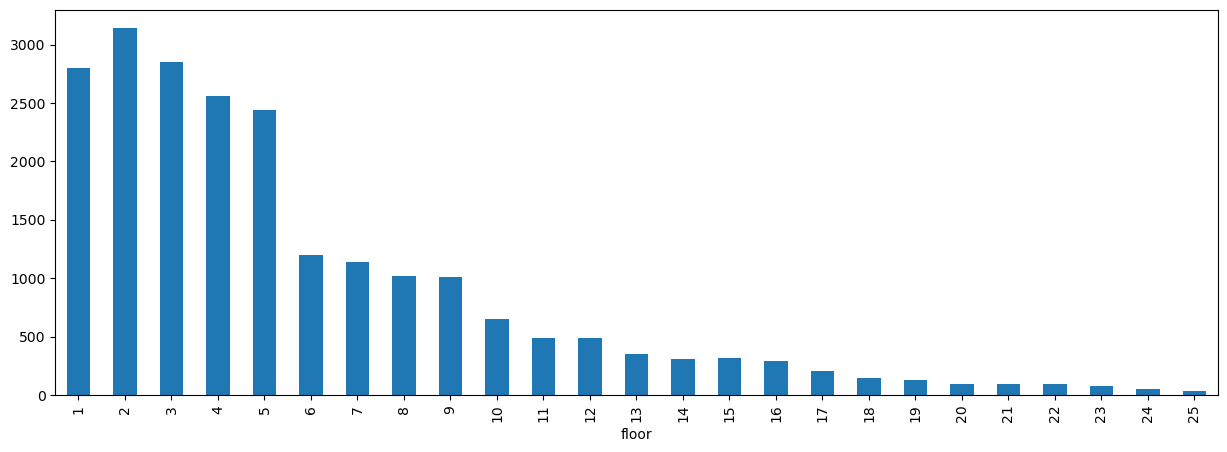

In [59]:
data.groupby('floor')['floor'].count().plot(kind='bar',figsize=(15,5))
data['floor'].describe()

Больше всего объектов в подборке находятся на втором этаже. 75% объектов находятся не выше 8 этажа.

##### Распределение по типу этажа

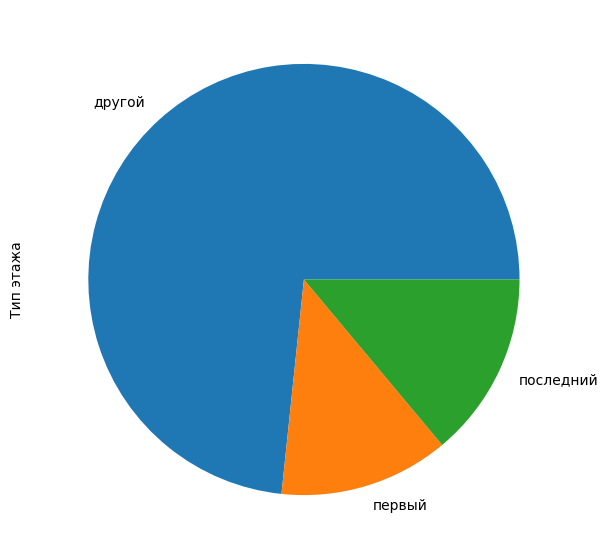

In [91]:
data.groupby('floor_type')['floor_type'].count().plot(kind='pie',figsize=(7,7),label='Тип этажа');

Почти три четверти объектов не находятся ни на первом, ни на последнем этаже.

##### Распределение по количеству этажей в доме

count    21969.000000
mean        10.553098
std          6.334970
min          1.000000
25%          5.000000
50%          9.000000
75%         15.000000
max         25.000000
Name: floors_total, dtype: float64

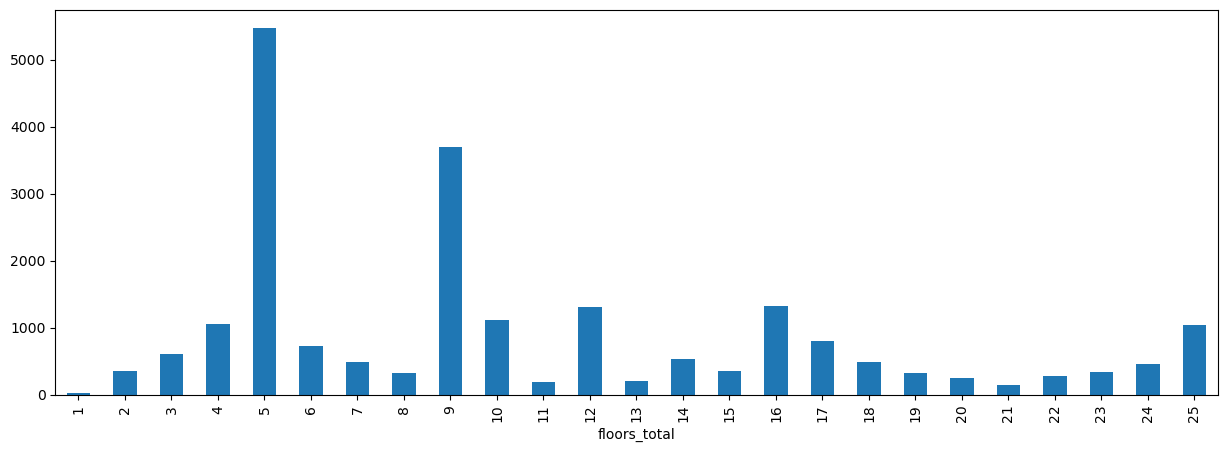

In [61]:
data.groupby('floors_total')['floor'].count().plot(kind='bar',figsize=(15,5))
data['floors_total'].describe()

В выборке преобладают пяти и девятиэтажные здания. Меньше всего одноэтажных.

##### Распределение по удаленности от центра

count    16644.000000
mean        14.543860
std          8.551574
min          0.000000
25%         10.000000
50%         13.000000
75%         16.000000
max         66.000000
Name: city_centers_nearest, dtype: float64

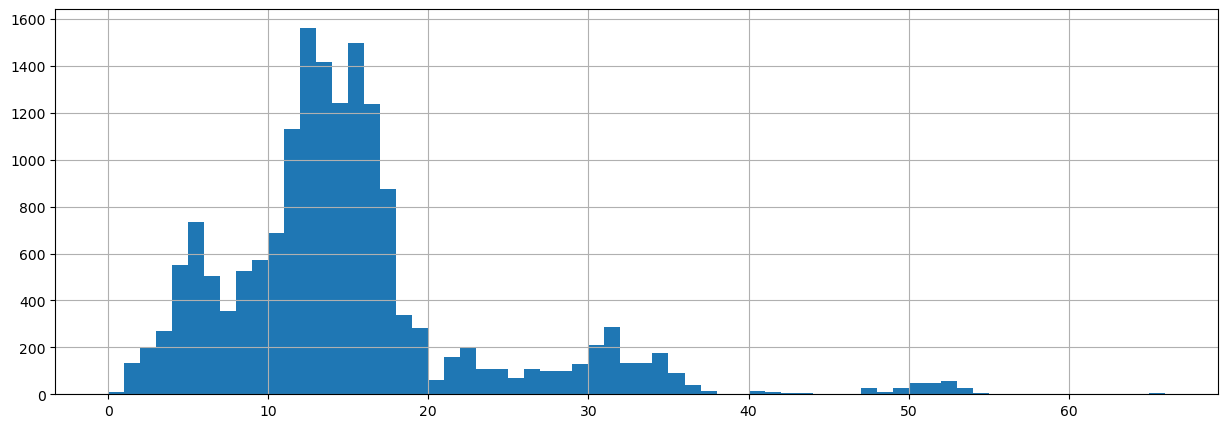

In [62]:
data['city_centers_nearest'].hist(bins=66,figsize=(15,5))
data['city_centers_nearest'].describe()

Больше всего объектов в нашей выборке находится на удаленности около 13км от центра. Неровности графика могут объясняться топографией локаций.

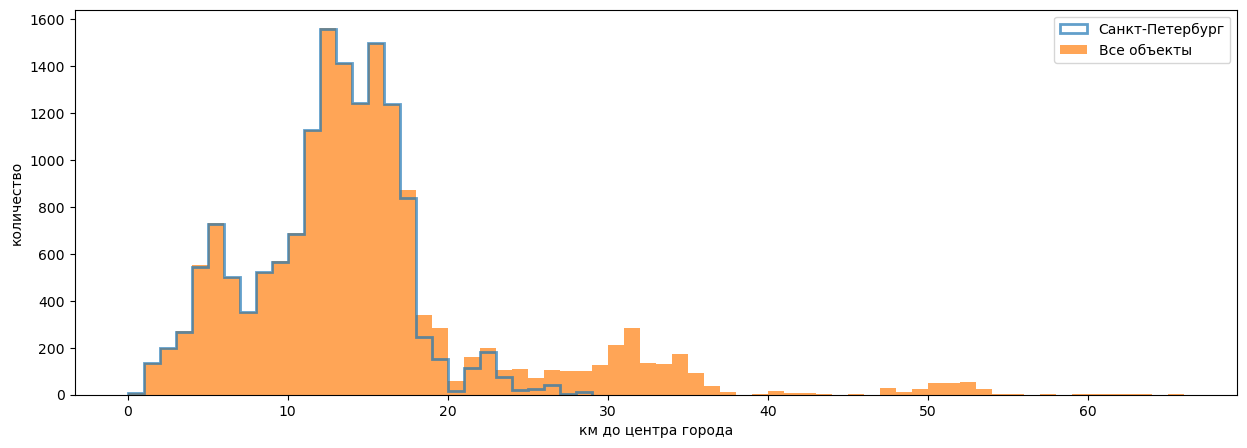

In [63]:
ax = data.query('locality_name == "Санкт-Петербург"').plot(  #строим график для СПб отдельно
    kind='hist',
    y='city_centers_nearest',
    bins=29,       #количество корзин на графике равно количеству километров включенных в срез
    histtype='step',
    linewidth=2,
    alpha=0.7,
    label='Санкт-Петербург'
)
data['city_centers_nearest'].plot(kind='hist',bins=66,figsize=(15,5),ax=ax,alpha=0.7, label='Все объекты',legend=True)

ax.set_xlabel('км до центра города')
ax.set_ylabel('количество');

Сравниваем график Санкт-Петербурга и всех объектов. Видно, что пик на 32 км и подъем на 52 км  - это другие локации. Внутри среза по СПб несколько пиков тоже можно объяснить тем, что он состоит из разных районов с разной плотностью застройки.

##### Распределение по удаленности от аэропорта

count    16624.000000
mean     28711.694538
std      12704.575972
min          0.000000
25%      18142.250000
50%      26947.000000
75%      37310.000000
max      84853.000000
Name: airports_nearest, dtype: float64

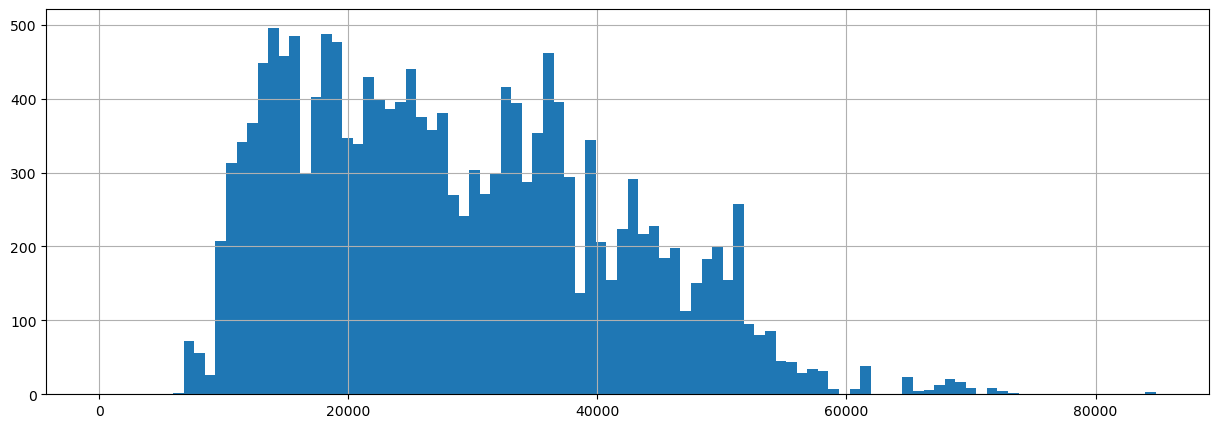

In [64]:
data['airports_nearest'].hist(bins=100,figsize=(15,5))
data['airports_nearest'].describe()

Половина объектов из выборки находится на удалении от 18 до 37,3 км от ближайшего аэропорта. Неровности графика можно объяснить неравномерностью плотности застройки. 

##### Распределение по удаленности от ближайшего водоема

count    8151.000000
mean      527.415532
std       276.439479
min        13.000000
25%       307.500000
50%       514.000000
75%       736.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

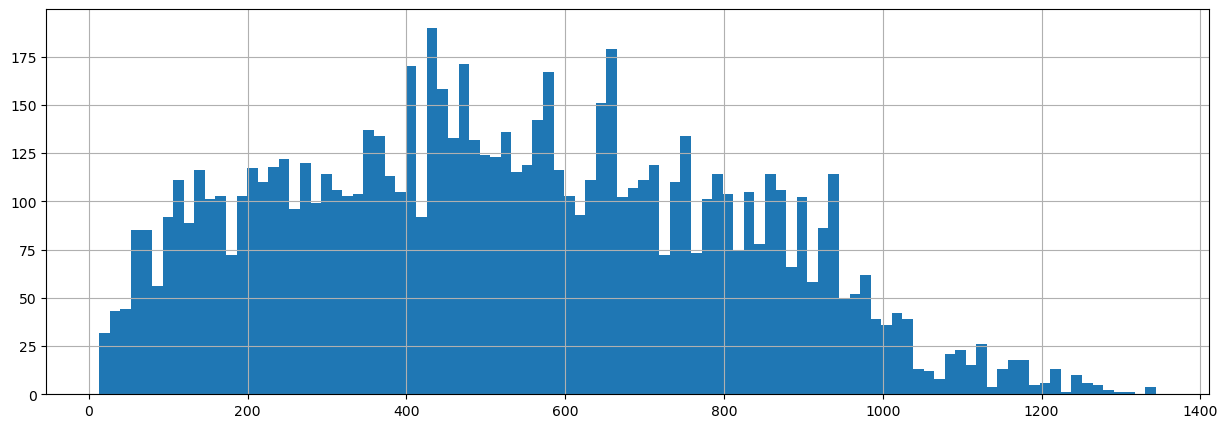

In [65]:
data['ponds_nearest'].hist(bins=100,figsize=(15,5))
data['ponds_nearest'].describe()

Чаще всего ближайший водоем будет находиться в 0,5 километра от объекта.

##### Распределение по дню недели публикации

<AxesSubplot:xlabel='published_weekday'>

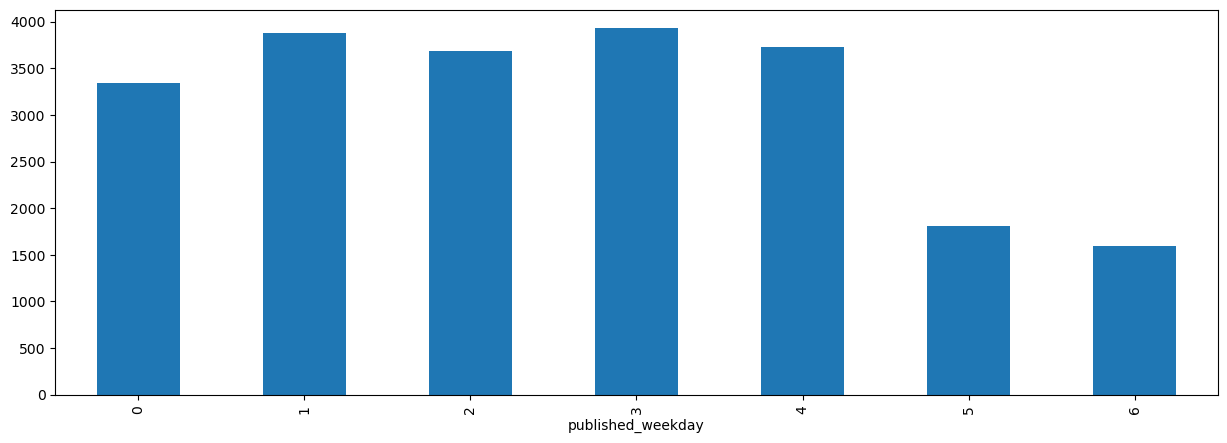

In [66]:
data.groupby('published_weekday')['published_weekday'].count().plot(kind='bar',figsize=(15,5))

Чаще всего объявления публикуются по будням.

##### Распределение по месяцу публикации

<AxesSubplot:xlabel='published_month'>

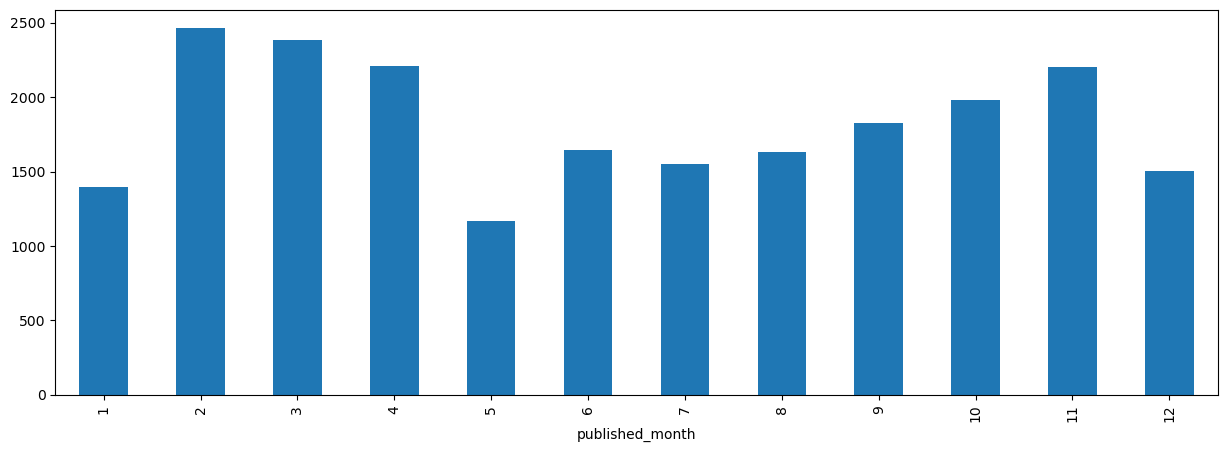

In [67]:
data.groupby('published_month')['published_month'].count().plot(kind='bar',figsize=(15,5))

Реже всего объявления публиковались в мае, январе и декабре. Больше всего объявлений публиковалось в феврале, марте и ноябре.

#### Как быстро продавались квартиры

count    19116.000000
mean       166.300115
std        189.606720
min          1.000000
25%         44.000000
50%         92.000000
75%        217.000000
max       1050.000000
Name: days_exposition, dtype: float64

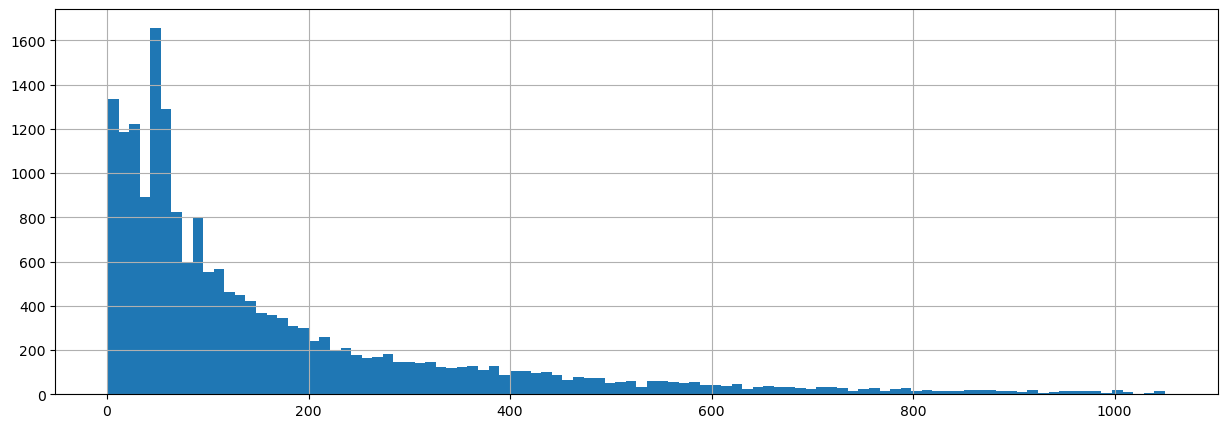

In [68]:
data['days_exposition'].hist(bins=100,figsize=(15,5))
data['days_exposition'].describe()

Обычно продажа занимает 102 дня (медиана). Но если смотреть на среднее, то видно что оно почти в два раза больше. На это повлияло то, что у нас есть некоторое количество объявлений которые провисели гораздо дольше среднего. Максимально объект продавался 4 года 4 месяца. Менее четвери продаж длилось дольше чем 217 дней. Примем это значение, как пороговое для необычно долгих продаж. Меньше четверти объектов продавалась быстрее чем за 44 дня. Посчитаем такие продажи быстрыми. 

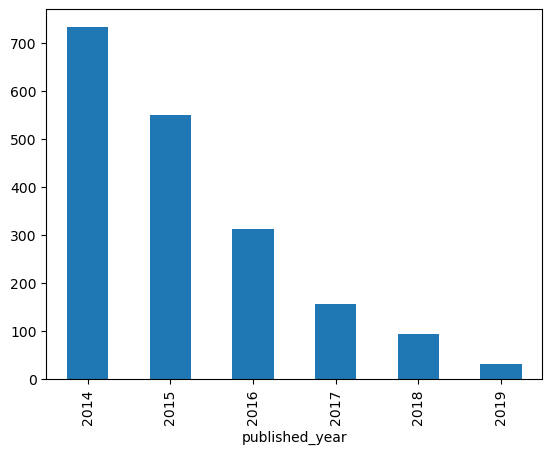

In [69]:
data.groupby('published_year')['days_exposition'].mean().plot(kind='bar');

С годами объекты продажи ускорялись

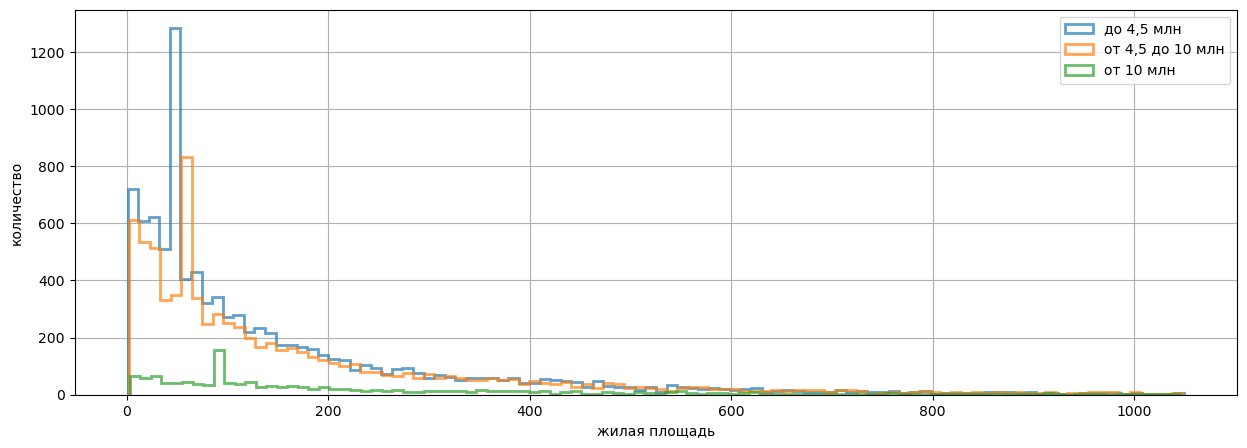

In [70]:
ax = data.query('last_price < 4500000').plot(  #строим графики для каждой из категорий
    kind='hist',
    y='days_exposition',
    bins=100,
    histtype='step',
    linewidth=2,
    alpha=0.7,
    label='до 4,5 млн'    
)
data.query('4500000 <= last_price < 10000000').plot(
    kind='hist',
    y='days_exposition',
    histtype='step',
    bins=100,
    linewidth=2,
    alpha=0.7,
    label='от 4,5 до 10 млн',
    ax=ax,
    grid=True,
    legend=True
) 

data.query('last_price >= 10000000').plot(
    kind='hist',
    y='days_exposition',
    histtype='step',
    bins=100,
    linewidth=2,
    alpha=0.7,
    label='от 10 млн',
    ax=ax,
    grid=True,
    legend=True,
    figsize=(15,5)
)

ax.set_xlabel('жилая площадь')
ax.set_ylabel('количество');

В зависимости от стоимости квартиры объявления имеют бесплатный период публикации. На графике можно видеть моды на 45, 60 и 90 дней для разных категорий. В этот момент бесплатная публикация заканчивалась.

####  Влияние различных факторов на цену

##### Влияние общей площади

0.742500607838921

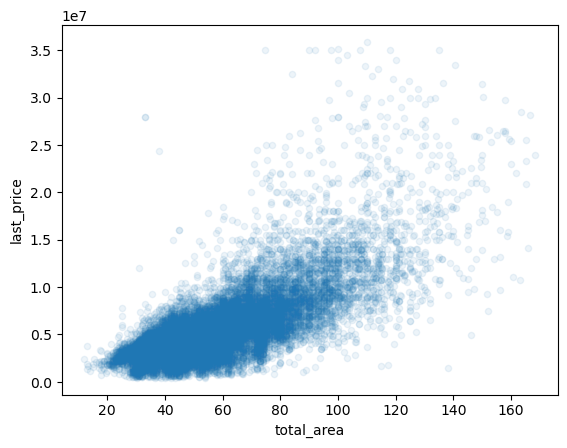

In [93]:
data.plot(x='total_area', y='last_price', kind='scatter',alpha=0.08)
data['last_price'].corr(data['total_area'])

Существует значительная положительная корреляция между ценой и общей площадью 

##### Влияние жилой площади

0.6215103811790189

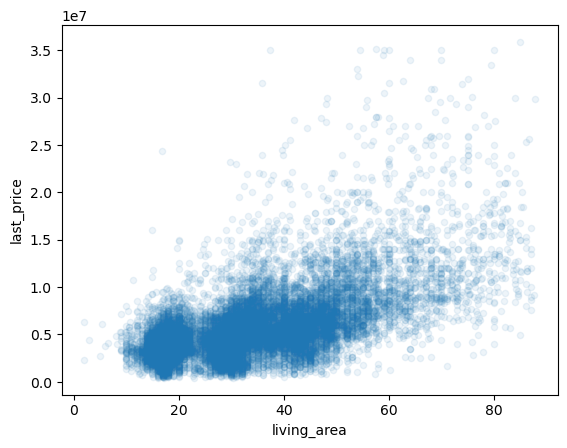

In [72]:
data.plot(x='living_area', y='last_price', kind='scatter',alpha=0.08)
data['last_price'].corr(data['living_area'])

Между ценой и жилой площадью все еще положительная корреляция, но уже менее выраженная

##### Влияние площади кухни

0.5468356163954619

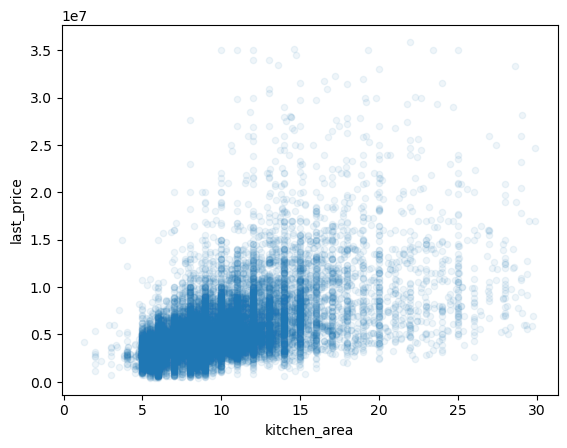

In [73]:
data.plot(x='kitchen_area', y='last_price', kind='scatter',alpha=0.07)
data['last_price'].corr(data['kitchen_area'])

Между ценой и площадью кухни корреляция еще менее яркая

##### Влияние количества комнат

0.440969133353781

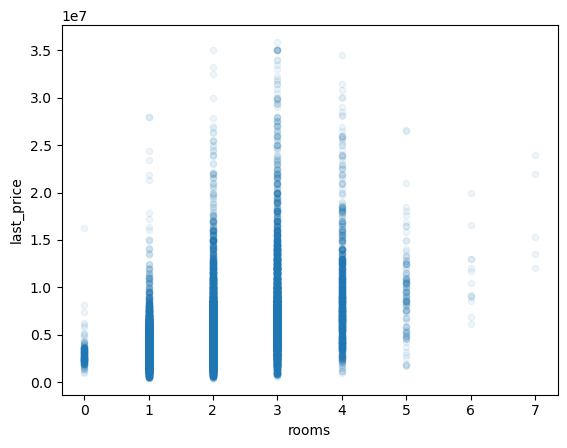

In [74]:
data.plot(x='rooms', y='last_price', kind='scatter',alpha=0.07)
data['last_price'].corr(data['rooms'])

Цена и количество комнат также коррелируют положительно

##### Влияние типа этажа

,count,mean,std,min,25%,50%,75%,max
floor_type,,,,,,,,
другой,16112.0,5.664037e+06,3.597858e+06,450000.0,3550000.0,4700000.0,6600000.0,35900000.0
первый,2798.0,4.357934e+06,2.727983e+06,430000.0,2750000.0,3850000.0,5250000.0,31500000.0
последний,3059.0,5.015638e+06,3.572204e+06,430000.0,2900000.0,4150000.0,6000000.0,34000000.0


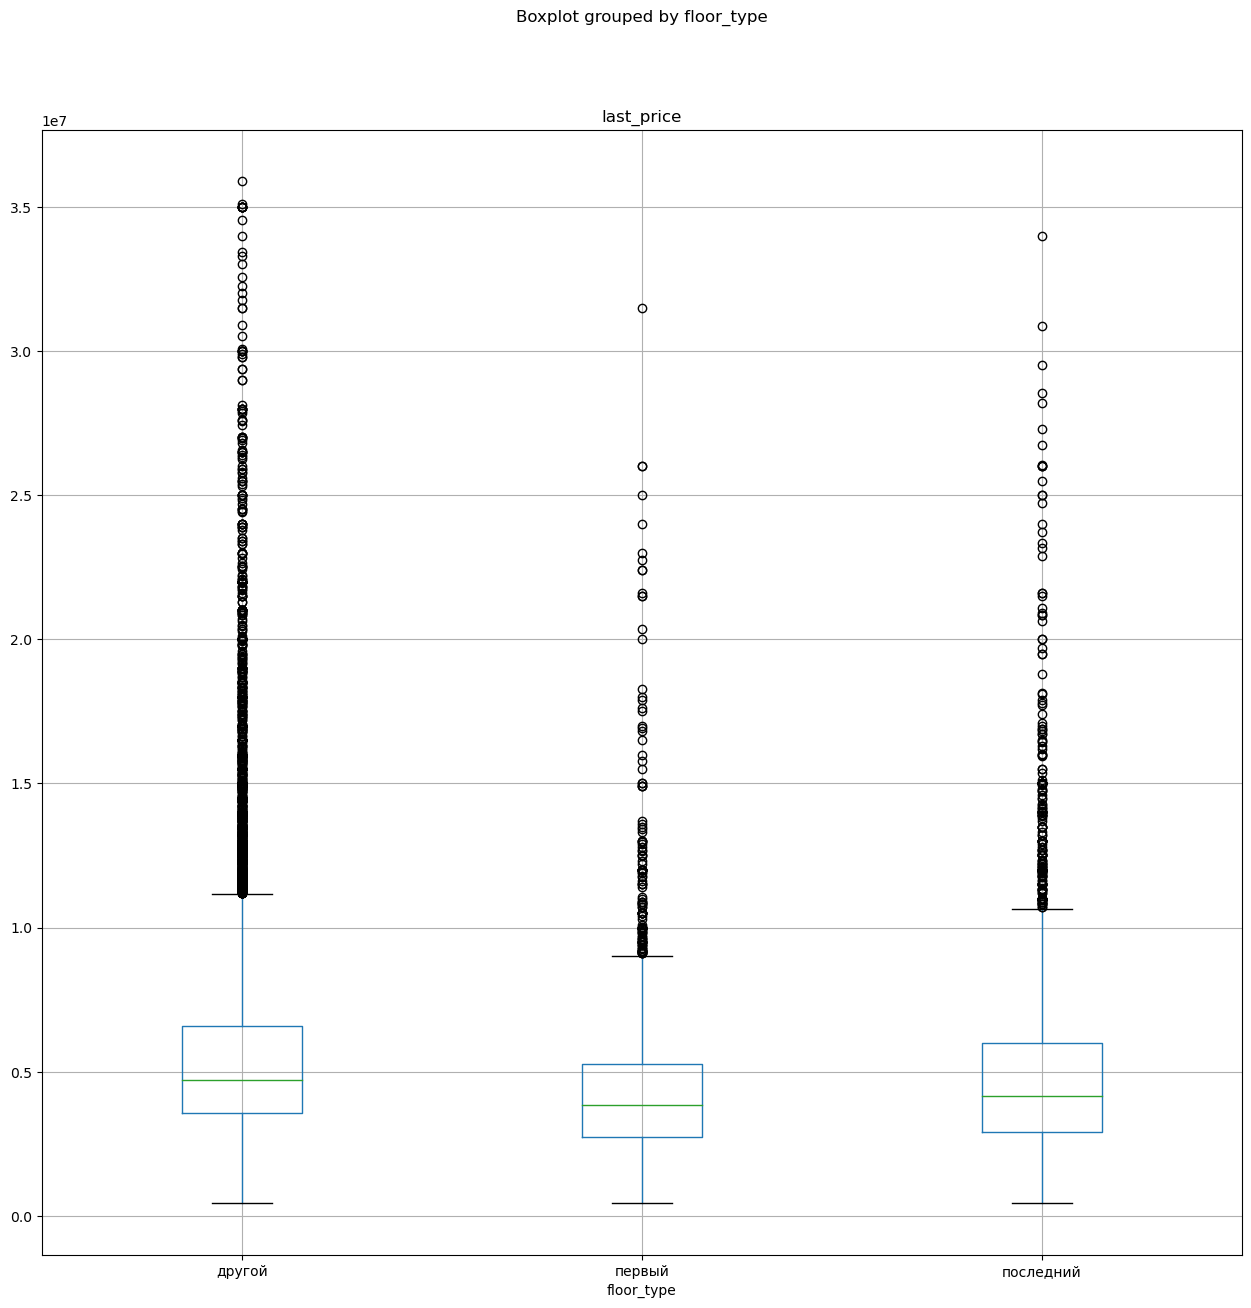

In [75]:
data.boxplot(column='last_price', by='floor_type', figsize=(15,15))
data.groupby('floor_type')['last_price'].describe()

Самые маленькое среднее значение цены у объектов находящихся на первом этаже, среднее значение категории другой и последний выше и они не сильно друго от друга отличаются, но последний немного ниже.

##### Влияние дня недели публикации

,count,mean,std,min,25%,50%,75%,max
published_weekday,,,,,,,,
0,3342.0,5.368544e+06,3.408252e+06,430000.0,3400000.0,4500000.0,6253750.0,31750000.0
1,3882.0,5.456175e+06,3.473316e+06,430000.0,3400000.0,4600000.0,6447500.0,35000000.0
2,3688.0,5.512156e+06,3.679104e+06,450000.0,3390000.0,4594500.0,6500000.0,35900000.0
3,3931.0,5.430844e+06,3.556633e+06,450000.0,3350000.0,4500000.0,6400000.0,35107000.0
4,3728.0,5.381760e+06,3.505436e+06,450000.0,3390000.0,4500000.0,6400000.0,34000000.0
5,1809.0,5.272149e+06,3.530896e+06,550000.0,3250000.0,4499000.0,6300000.0,35000000.0
6,1589.0,5.283040e+06,3.485733e+06,470000.0,3320000.0,4480000.0,6100000.0,35000000.0


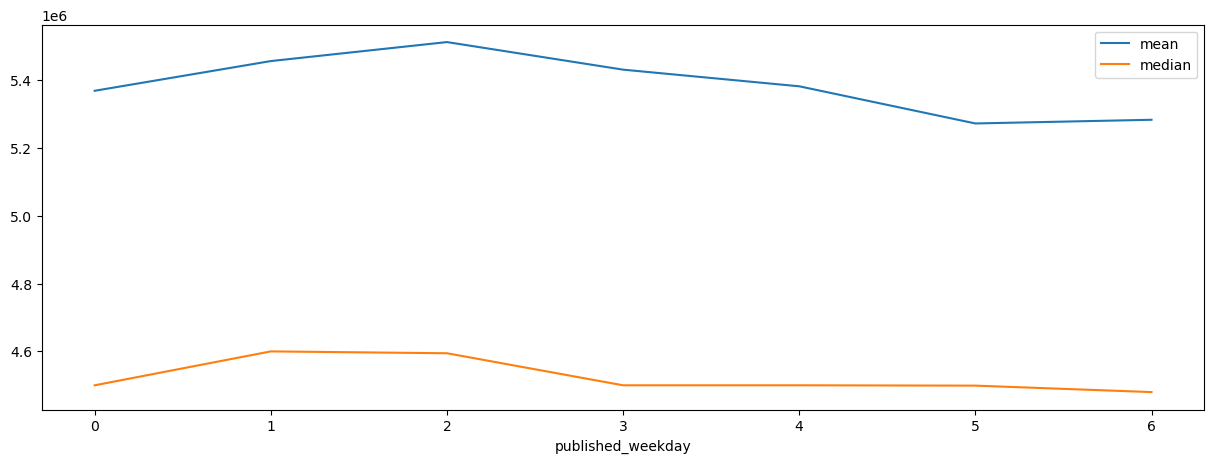

In [76]:
data.groupby('published_weekday')['last_price'].mean().plot(label='mean',legend=True)
data.groupby('published_weekday')['last_price'].median().plot(label='median',legend=True, figsize=(15,5))
data.groupby('published_weekday')['last_price'].describe()

В выходные средние цены на недвижимость немного ниже

##### Влияние месяца публикации

,count,mean,std,min,25%,50%,75%,max
published_month,,,,,,,,
1,1394.0,5.396894e+06,3.563413e+06,480000.0,3350000.0,4500000.0,6350000.0,35000000.0
2,2464.0,5.432528e+06,3.639666e+06,450000.0,3300000.0,4500000.0,6400000.0,35000000.0
3,2384.0,5.366639e+06,3.502788e+06,550000.0,3338750.0,4500000.0,6250000.0,33415200.0
4,2213.0,5.455242e+06,3.346052e+06,430000.0,3490000.0,4690000.0,6500000.0,35000000.0
5,1170.0,5.291033e+06,3.330692e+06,490000.0,3400000.0,4400000.0,6200000.0,35000000.0
6,1645.0,5.293442e+06,3.770619e+06,430000.0,3250000.0,4300000.0,6300000.0,35107000.0
7,1550.0,5.357225e+06,3.454754e+06,440000.0,3400000.0,4500000.0,6218706.0,30500000.0
8,1629.0,5.485706e+06,3.757971e+06,450000.0,3350000.0,4500000.0,6400000.0,35900000.0
9,1830.0,5.531928e+06,3.480989e+06,520000.0,3400000.0,4590000.0,6468500.0,29000000.0


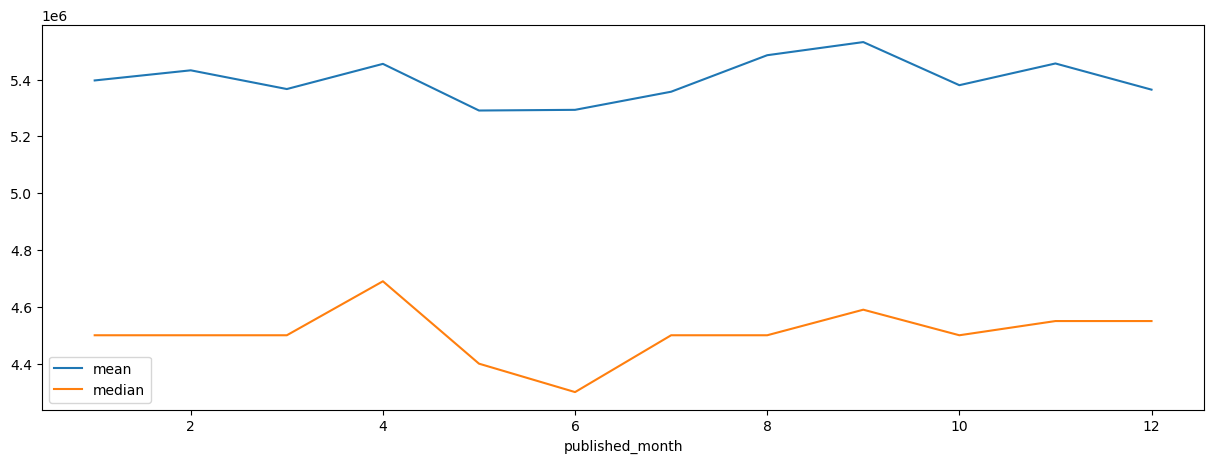

In [77]:
data.groupby('published_month')['last_price'].mean().plot(label='mean',legend=True)
data.groupby('published_month')['last_price'].median().plot(label='median',legend=True, figsize=(15,5))
data.groupby('published_month')['last_price'].describe()

Похоже, что в июне средние цены на недвижимость немного ниже

##### Влияние года публикации

<AxesSubplot:xlabel='published_year'>

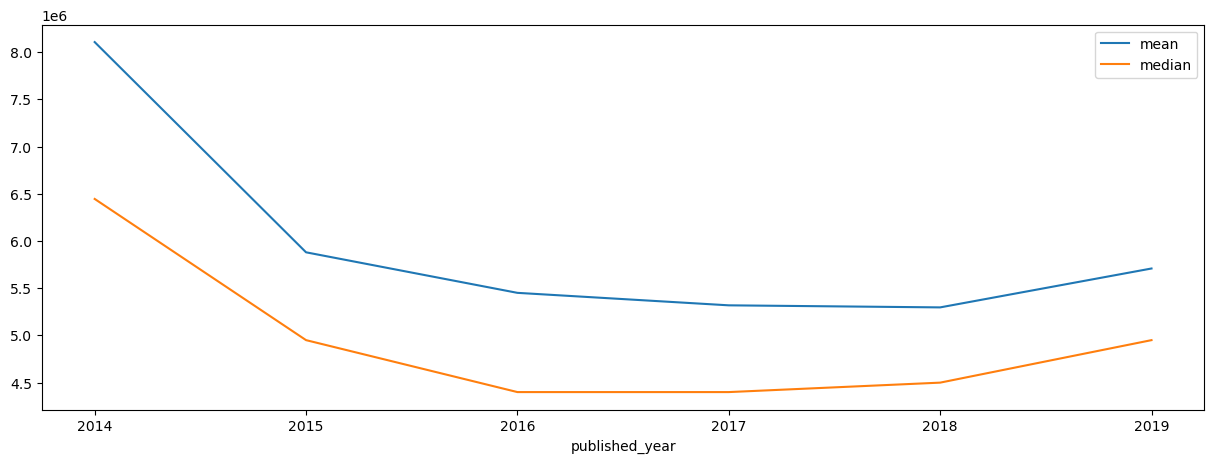

In [78]:
data.groupby('published_year')['last_price'].mean().plot(label='mean',legend=True)
data.groupby('published_year')['last_price'].median().plot(label='median',legend=True, figsize=(15,5))

График отражает снижение цен на недвижимость с 2014 по 2016 и рост в 2018 и 2019 году.

In [79]:
data_table = (
    data.groupby('published_year')
    .agg({'total_area':['count','mean'], 'last_price':['mean','median'],'price_per_meter':'mean'}) 
)

data_table.columns = ['Количество публикаций','Средняя площадь', 'Средняя цена', 'Медианная цена', 'Средняя цена за метр']
data_table

,Количество публикаций,Средняя площадь,Средняя цена,Медианная цена,Средняя цена за метр
published_year,,,,,
2014,80,74.142875,8.105822e+06,6445000.0,104598.239250
2015,917,60.570851,5.879907e+06,4950000.0,94747.486140
2016,2564,56.813452,5.450690e+06,4400000.0,93737.433358
2017,7644,55.527881,5.318537e+06,4400000.0,93645.065276
2018,8067,54.535449,5.296718e+06,4500000.0,95490.660307
2019,2697,54.561620,5.708514e+06,4950000.0,103290.296174


Количество публикаций же с годами увеличивалось (в 2019 публикаций меньше, из-за того что выгружен не весь год, а только данные по 3 мая)

In [80]:
data.query('published_year == 2019')['first_day_exposition'].agg(['min','max'])

min   2019-01-01
max   2019-05-03
Name: first_day_exposition, dtype: datetime64[ns]

Так же с годами уменьшилась средняя площадь публикуемых объектов.
При этом средняя цена за метр, как и общая цена уменьшалась с 2014 по 2016, и росла в 2018, 2019

#### Средняя цена квадратного метра

,price_per_meter
locality_name,
Санкт-Петербург,"110,087.51"
Пушкин,"102,436.11"
Кудрово,"95,345.17"
Мурино,"86,237.71"
Парголово,"85,726.65"
Шушары,"78,724.58"
Колпино,"75,279.71"
Гатчина,"68,766.36"
Всеволожск,"68,521.36"


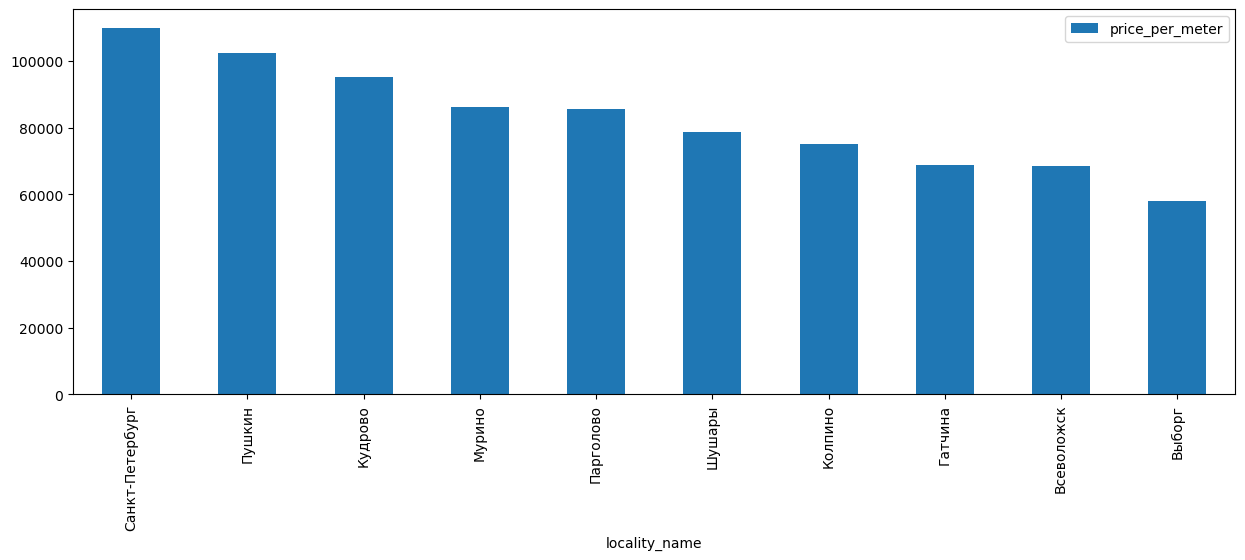

In [81]:
top_locality = (data.groupby('locality_name')
                .count()
                .sort_values('price_per_meter', ascending=False)     #список топа городов по количеству объявлений
                .head(10)
                .index                                        
               )

top_locality_prices = (
    data.query('locality_name in @top_locality')
    .pivot_table(index='locality_name', values='price_per_meter')    #средняя цена за метр в топе городов
    .sort_values('price_per_meter', ascending=False)
    
)

top_locality_prices.plot(kind='bar',figsize=(15,5))
top_locality_prices.style.format("{:,.2f}")

#### Цены в Петербурге в зависимости от удаленности от центра города

city_centers_nearest
27.0    2
28.0    7
Name: last_price, dtype: int64

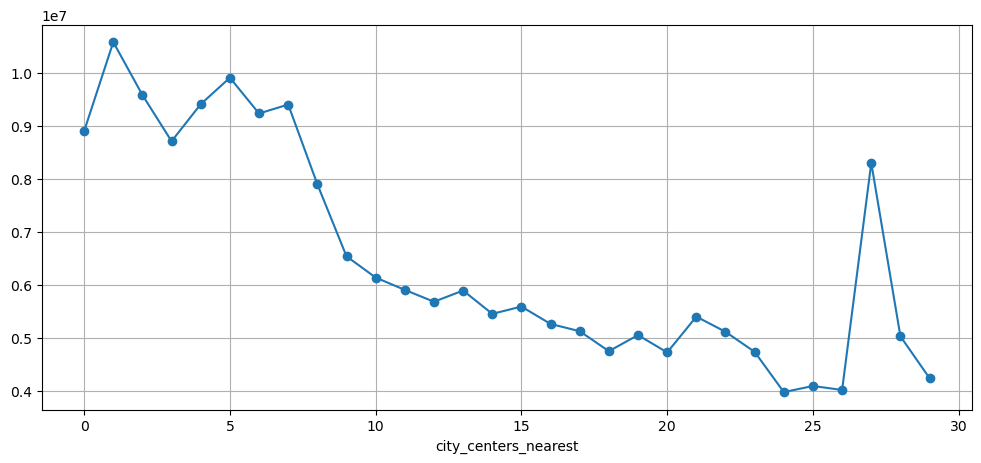

In [82]:
(
    data.query('locality_name == "Санкт-Петербург"')      #выбираем срез по Санкт-Петербургу
    .groupby('city_centers_nearest')['last_price'].mean() #находим среднюю цену объектов в зависимости от удаленности от центра
    .plot(style='o-', grid=True, figsize=(12, 5))         #строим график
)
(
    data.query('locality_name == "Санкт-Петербург" and city_centers_nearest == (27,28)') #выбираем срез по СПб и удаленности от центра 27,28 км
    .groupby('city_centers_nearest')['last_price'].count()                               #считаем количество данных в подвыборке
)

На графике видно, что цена имеет тренд на снижение по удалению от центра, но на 27 и 28 километре средняя цена резко возрастает. Возможно, так получилось из-за того, что на этом удалении в нашу выборку попало всего мало объектов и они оказались очень дорогими. Мы не можем делать вывод, что на таком удалении от центра действительно средняя цена такая высокая, возможно это совпадение.

,3,5
floor_type,,
другой,59.11%,74.90%
первый,17.47%,9.88%
последний,23.42%,15.23%


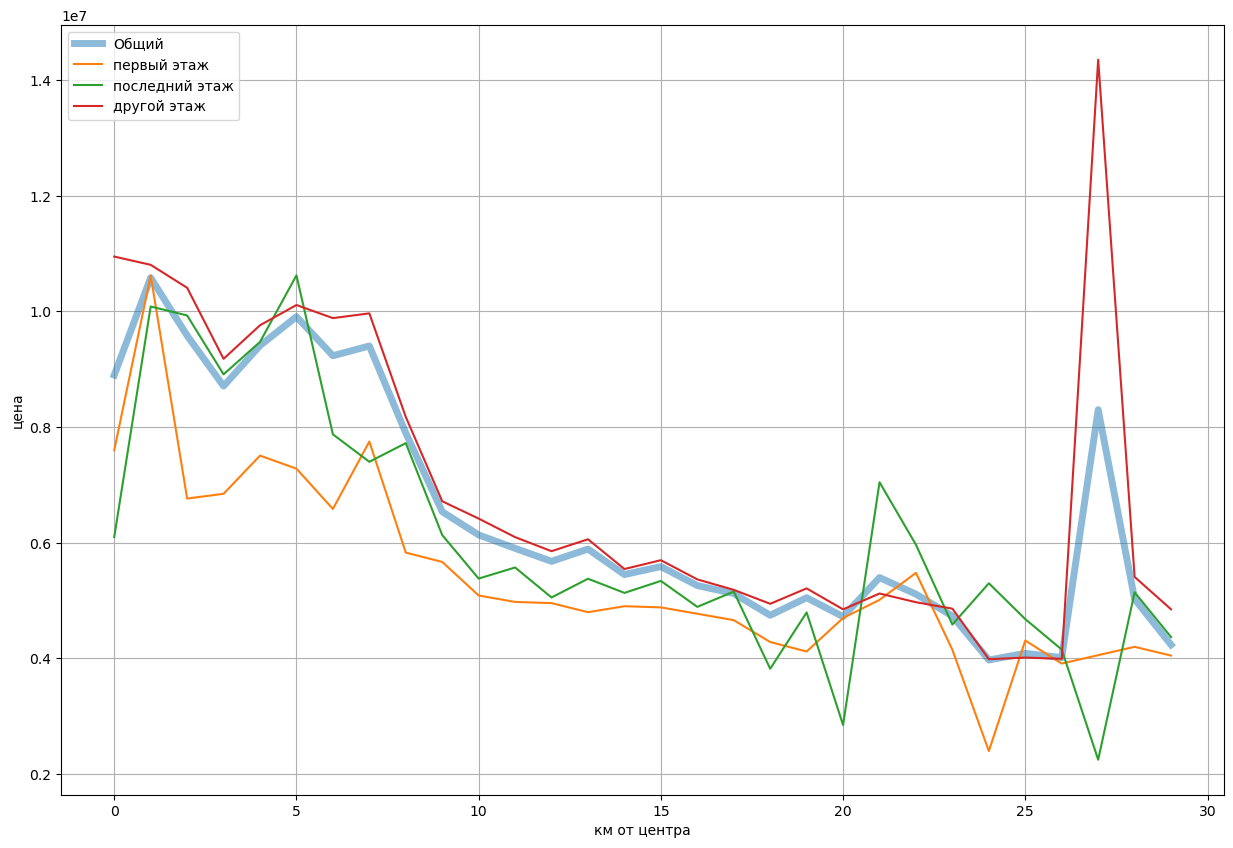

In [83]:
ax=(
    data.query('locality_name == "Санкт-Петербург"')      #выбираем срез по Санкт-Петербургу
    .groupby('city_centers_nearest')['last_price'].mean() #находим среднюю цену объектов в зависимости от удаленности от центра
    .plot(grid=True, figsize=(15, 10),linewidth=5,alpha=0.5, label='Общий', legend=True)         #строим график
)

(
    data.query('locality_name == "Санкт-Петербург" and floor_type == "первый"')         #выбираем срез по Санкт-Петербургу
    .groupby('city_centers_nearest')['last_price'].mean()                               #и первому этажу
    .plot(figsize=(15, 10), label='первый этаж', legend=True, ax=ax)      
)
(
    data.query('locality_name == "Санкт-Петербург" and floor_type == "последний"')      #выбираем срез по Санкт-Петербургу
    .groupby('city_centers_nearest')['last_price'].mean()                               #и последнему этажу
    .plot(grid=True, figsize=(15, 10), label='последний этаж', legend=True, ax=ax)         
)
(
    data.query('locality_name == "Санкт-Петербург" and floor_type == "другой"')         #выбираем срез по Санкт-Петербургу
    .groupby('city_centers_nearest')['last_price'].mean()                               #и другому этажу
    .plot( grid=True, figsize=(15, 10), label='другой этаж', legend=True, ax=ax)        
)

ax.set_xlabel('км от центра')
ax.set_ylabel('цена');

floors_count = pd.DataFrame(columns=['3', '5'])
floors_count['3'] = (data.query('locality_name == "Санкт-Петербург" & city_centers_nearest == 3')
                .groupby('floor_type')['floor_type'].count())
floors_count['5'] = (data.query('locality_name == "Санкт-Петербург" & city_centers_nearest == 5')
                .groupby('floor_type')['floor_type'].count())
(floors_count/floors_count.sum()).style.format("{:.2%}")

Вне зависимости от типа этажа на 3 км есть провал, а на 5 есть пик. У квартир на первом этаже на пятом километре почти нет пика, но их всего 10% от  всего количества, поэтому это не повлияло на результат

,3,5
rooms,,
0,0.37%,0.41%
1,11.15%,19.62%
2,35.69%,30.86%
3,34.57%,33.06%
4,14.50%,13.17%
5,2.97%,2.19%
7,0.74%,0.27%


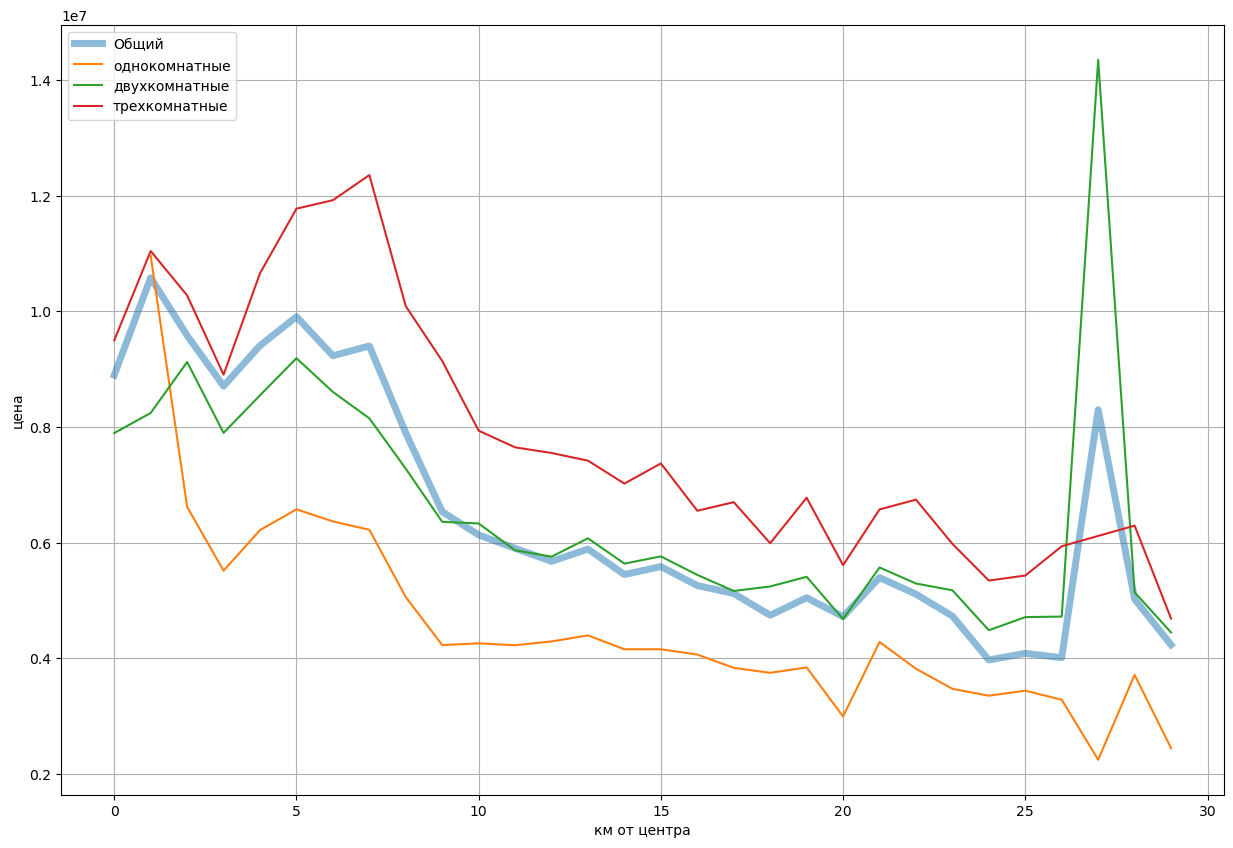

In [84]:
ax=(
    data.query('locality_name == "Санкт-Петербург"')      #выбираем срез по Санкт-Петербургу
    .groupby('city_centers_nearest')['last_price'].mean() #находим среднюю цену объектов в зависимости от удаленности от центра
    .plot(grid=True, figsize=(15, 10),linewidth=5,alpha=0.5, label='Общий', legend=True)         #строим график
)

(
    data.query('locality_name == "Санкт-Петербург" and rooms == 1')      #выбираем срез по Санкт-Петербургу
    .groupby('city_centers_nearest')['last_price'].mean()                #и однокомнатным
    .plot(figsize=(15, 10), label='однокомнатные', legend=True)         
)
(
    data.query('locality_name == "Санкт-Петербург" and rooms == 2')      #выбираем срез по Санкт-Петербургу
    .groupby('city_centers_nearest')['last_price'].mean()                #и двухкомнатным
    .plot(grid=True, figsize=(15, 10), label='двухкомнатные', legend=True)         
)
(
    data.query('locality_name == "Санкт-Петербург" and rooms == 3')      #выбираем срез по Санкт-Петербургу
    .groupby('city_centers_nearest')['last_price'].mean()                #и трехкомнатным
    .plot( grid=True, figsize=(15, 10), label='трехкомнатные', legend=True)         
)

ax.set_xlabel('км от центра')
ax.set_ylabel('цена');

rooms_count = pd.DataFrame(columns=['3', '5'])
rooms_count['3'] = (data.query('locality_name == "Санкт-Петербург" & city_centers_nearest == 3')
                .groupby('rooms')['rooms'].count())
rooms_count['5'] = (data.query('locality_name == "Санкт-Петербург" & city_centers_nearest == 5')
                .groupby('rooms')['rooms'].count())
(rooms_count/floors_count.sum()).style.format("{:.2%}")

Вне зависимости от количества комнат, на третьем километре есть провал, а на 5 повышение.

### Общий вывод

Наша задача — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости. Мы изучали входные данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах. В ходе предобработки данных были выявлены ошибки в данных: пропуски, аномальные значения, неявные дубликаты названий населенных пунктов. Пропуски были заполены нулями,где это было логично, добалены булевы значения при их отсутствии, убраны названия населенных пунктов, чтобы избежать дублирование, строчки с аномальной высотой потолка либо удалены, либо уменьшены в 10 раз(для показателя больше 15 метров), удалена строчка с аномально маленькой ценой, так же удалены строчки с аномально большой ценой. Так же у нас в данных о цене, площади и высотой потолка присутствуют значения сильно выше рынка, которые мешают нам увидеть картину целиком. Убрали пол процента данных с самыми высокими значениями.

Изучив распределения параметров объектов, были найдены следующих зависимостей:
- Графики распределения площади выглядят стремящимися к пуассоновским, но в зависимости от комнатности пиковые значения отличаются. Поэтому на общих графиках для трех самых больших категорий(1,2 и 3 комнаты) выделяются отдельные пики. 
- Общая площадь однокомнатных квартир чаще всего равняется 30м, у двухкомнатных 45м, а у трехкомнатных 60м.
- Жилая площадь однокомнатных квартир чаще всего около 18 метров, у двухкомнатных - 30, а у трехкомнатных - 43.
- Медианная цена на объекты в нашей выборке 4,5 млн. Среднее же выше почти на миллион. Это показывает, что у нас есть отдельные выбросы ввиде очень дорогих объектов. График достаточно плавный, здесь не наблюдается отдельных пиков для разной комнатности.
- В выборке есть объекты от 0 до 7 комнат. Больше всего у нас одно- двух- и трех- комнатных объектов.
- В основном в нашей базе данных квартиры с потолками 2,5-2,7 м
- Больше всего объектов в подборке находятся на втором этаже. 75% объектов находятся не выше 8 этажа.
- В выборке преобладают пяти и девятиэтажные здания. Меньше всего одноэтажных.
- Больше всего объектов в нашей выборке находится на удаленности около 13км от центра. Неровности графика могут объясняться наличием разных районов с разной плотностью застройки.
- Половина объектов из выборки находится на удалении от 18 до 37 км от ближайшего аэропорта. Неровности графика также можно объяснить неравномерностью плотности застройки.
- Половина объектов из выборки находится на удалении не более 0,5 километра от ближайшего водоема.
- Чаще всего объявления публикуются по будням.
- Наблюдается сезонность в частоте публикаций. Реже всего объявления публиковались в мае, январе и декабре. Больше всего объявлений публиковалось в феврале, марте и ноябре.

- Обычно продажа занимает 102 дня (медиана). Максимально объект продавался 4 года 4 месяца. Необычно долгой можно считать  продажу дольше 217 дней. Быстрыми можно считать продажи, быстрее чем за 44 дня.

Также мы изучили влияние различных факторов на цену квартиры:
- Достаточно сильно на цену влияет общая площадь квартиры. Чуть меньше, но тоже значительно влияет ее жилая площадь и площадь кухни.
- Меньше чем площадь на цену влияет количество комнат.
- Самые маленькое среднее значение цены у объектов находящихся на первом этаже, среднее значение категории другой и последний выше и они не сильно друго от друга отличаются, но последний немного ниже.
- Средняя цена немного уменьшается в выходные.
- Средние цены немного ниже в июне и немного выше в апреле и ноябре.
- Средние цены на недвижимость падали с 2014 по 2016 и росли в 2018 и 2019 году.
- Количество публикаций с годами увеличивалось (в 2019 публикаций меньше, из-за того что выгружен не весь год, а только данные по 3 мая)
- Так же с годами уменьшилась средняя площадь публикуемых объектов. При этом средняя цена за метр, как и общая цена уменьшалась с 2014 по 2016, и росла в 2018, 2019.

Мы определили топ населенных пунктов в нашей выборке по количеству объявлений и посчитали среднюю цену за квадратный метр для каждого из них. Максимальная цена в этом срезе оказалась в Санкт-Петербурге, а минимальная в Выборге.

Так же мы построили график средних цен по Санкт-Петербургу в зависимости от отдаленности от центра. Он показал тренд на уменьшение цены недвижимости при удалении от центра города. Вне зависимости от типа этажа и количества комнат на 3 км от центра есть заметный провал в цене, а на 5 км пик.

### Бонус

In [85]:
# check
import seaborn as sns
import matplotlib.pyplot as plt

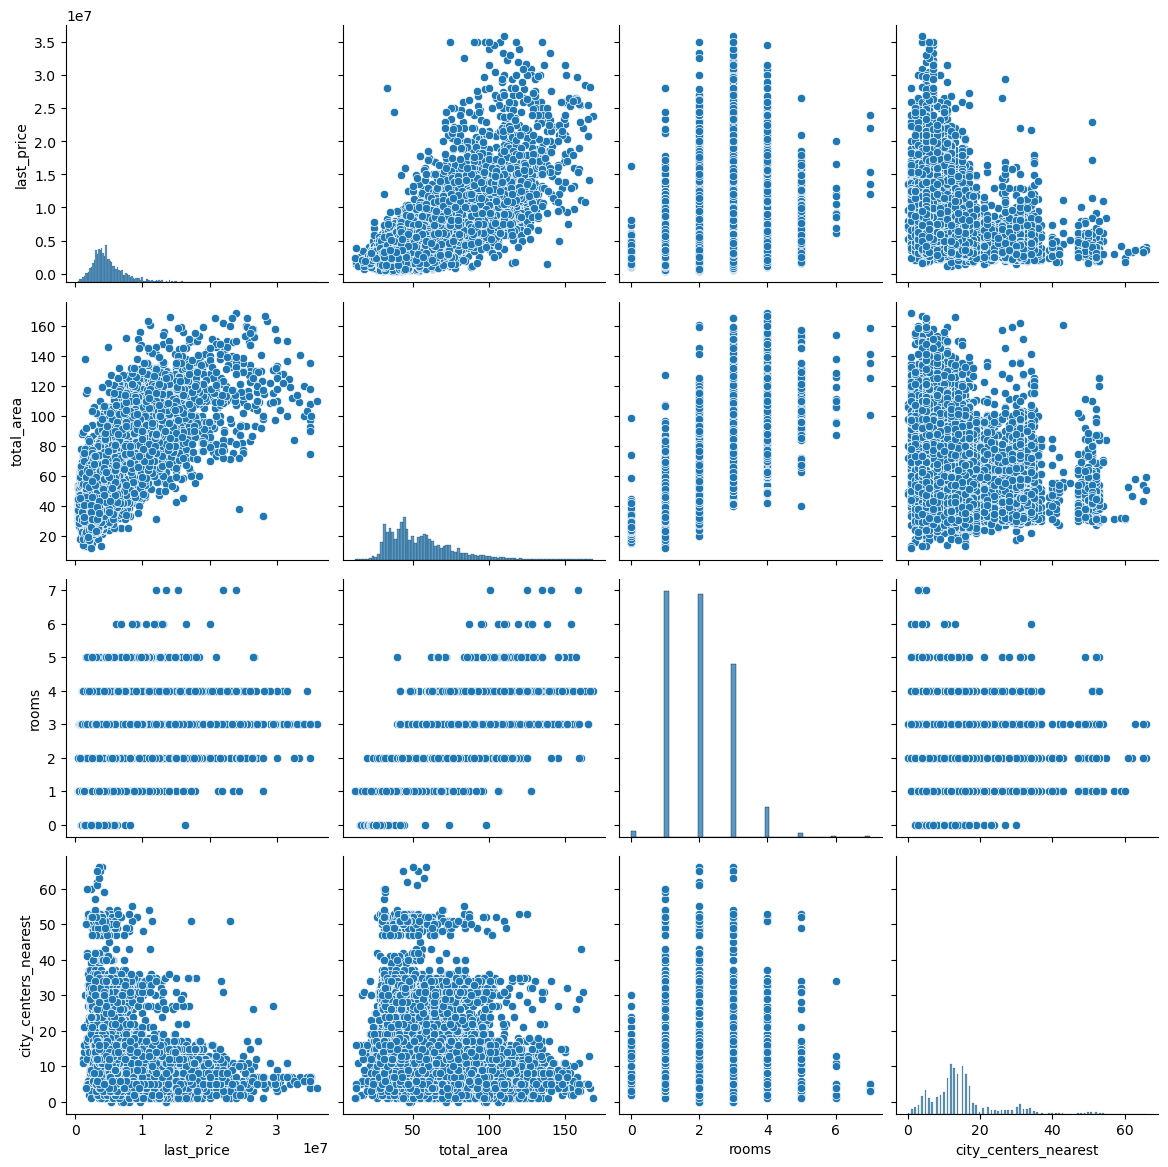

In [86]:
# check
sns.pairplot(data[['last_price', 'total_area', 'rooms', 'city_centers_nearest']])
plt.gcf().set_size_inches(12,12);


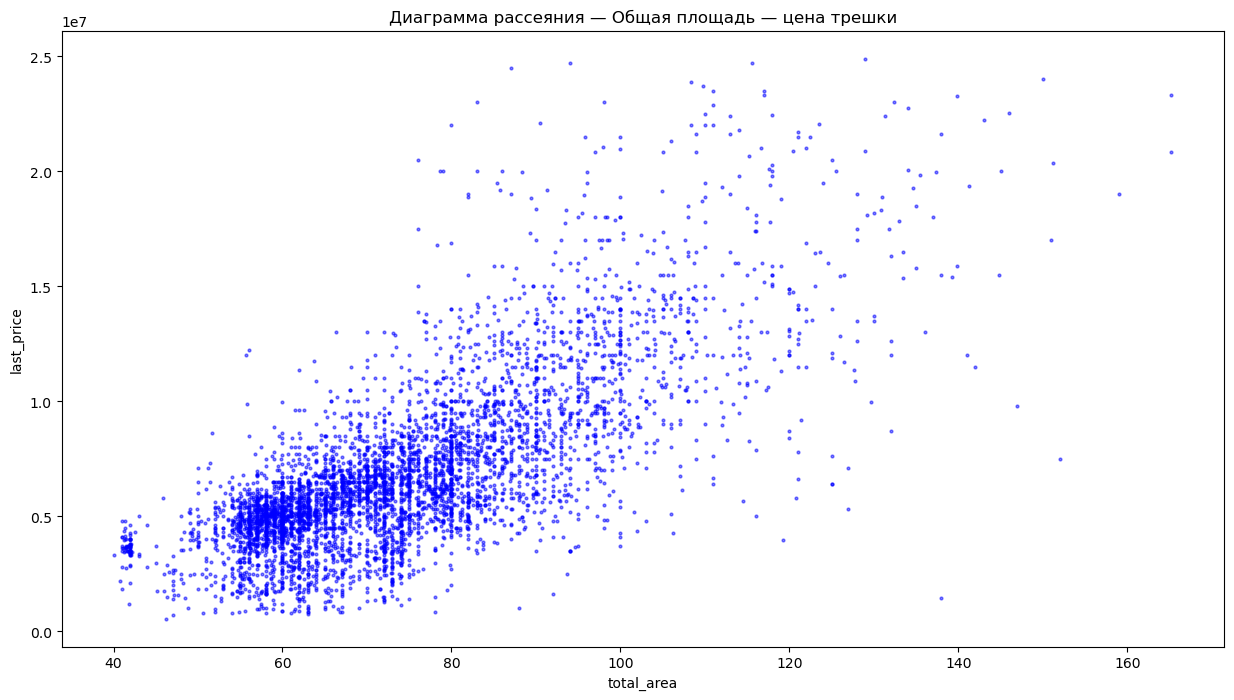

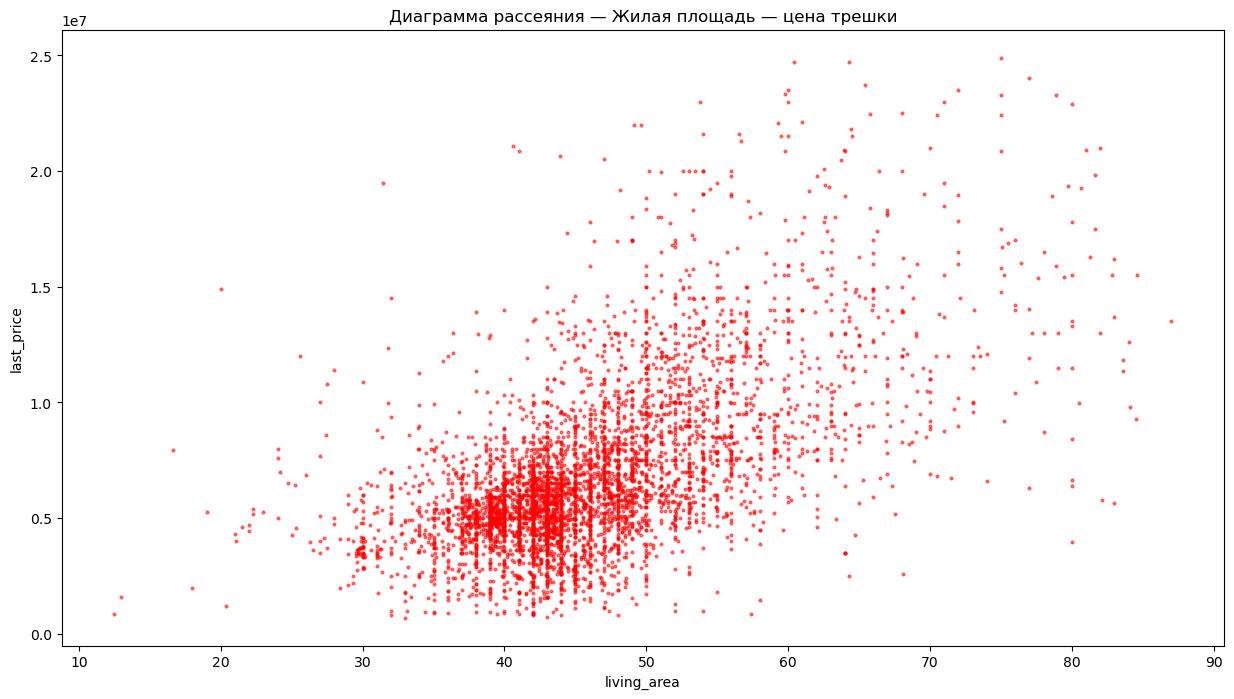

In [87]:
# check
data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter',
        y='last_price' , x='total_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.title('Диаграмма рассеяния — Общая площадь — цена трешки')


data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter', 
        y='last_price' , x='living_area', alpha=0.5, figsize=(15,8), c = 'r', s = 4)
plt.title('Диаграмма рассеяния — Жилая площадь — цена трешки');

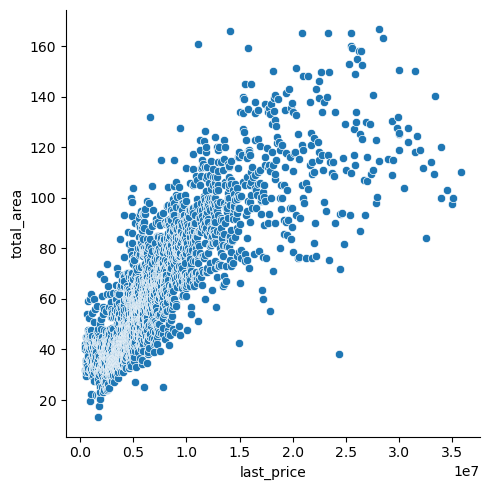

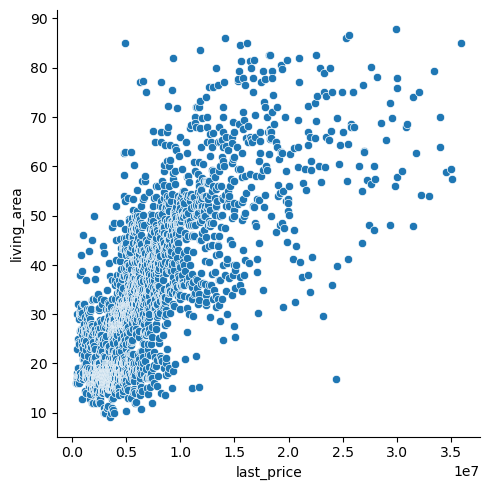

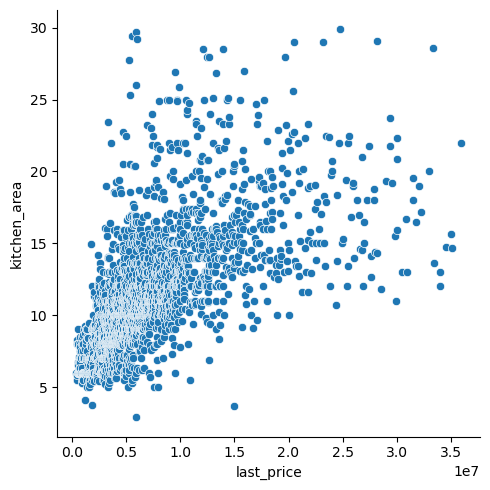

In [88]:
# check
price_pivot_area = data.pivot_table(index='last_price', values=([
    'total_area', 'living_area', 'kitchen_area']), aggfunc='median')
price_pivot_area = price_pivot_area.reset_index()
# Посмотрим на диаграммы рассеяния для столбцов 'total_area', 'living_area', 'kitchen_area'.
for row in ['total_area', 'living_area', 'kitchen_area']:
    sns.relplot(data=price_pivot_area, x='last_price', y=row, kind='scatter')

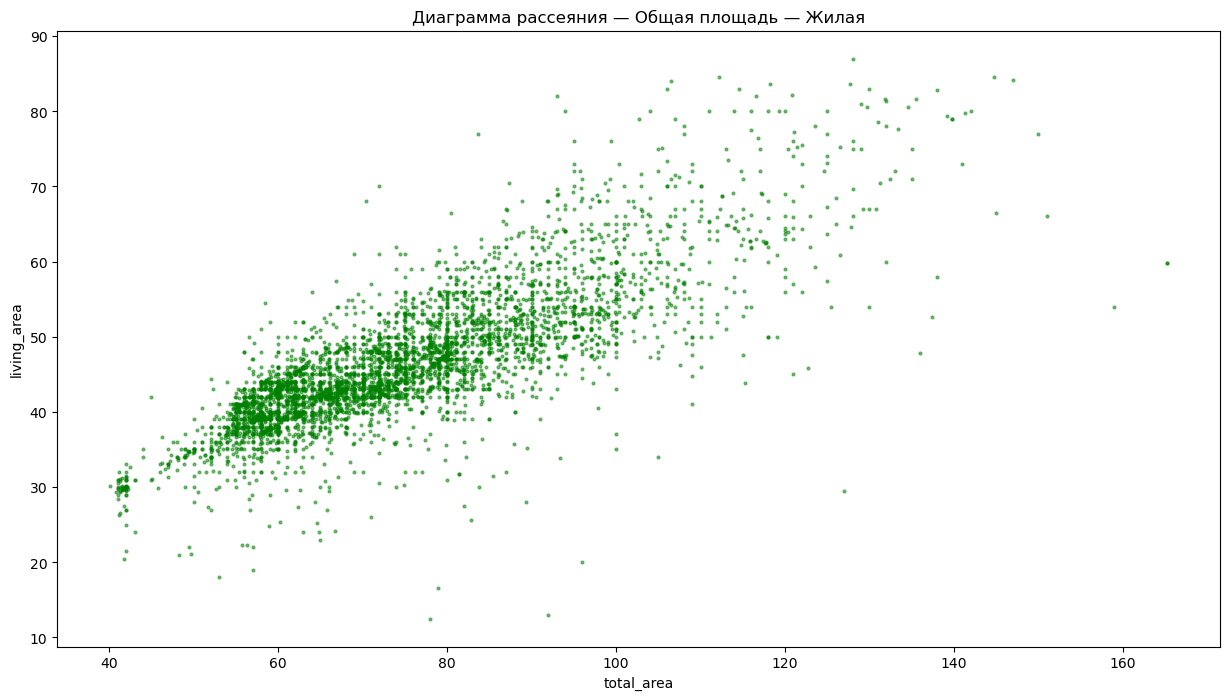

In [89]:
# check
data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter',
        y='living_area' , x='total_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'g', s = 4)
plt.title('Диаграмма рассеяния — Общая площадь — Жилая');